In [512]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import math
%matplotlib inline
import datetime

In [513]:
df = pd.read_csv('appointment.csv')

In [514]:
df.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [515]:
print(df['Gender'].value_counts())
print(df['DayOfTheWeek'].value_counts())
print(df['Diabetes'].value_counts())
print(df['Alcoolism'].value_counts())
print(df['HiperTension'].value_counts())
print(df['Handcap'].value_counts())
print(df['Smokes'].value_counts())
print(df['Tuberculosis'].value_counts())
print(df['Sms_Reminder'].value_counts())
print(df['Status'].value_counts())

F    393
M    201
Name: Gender, dtype: int64
Thursday     130
Wednesday    128
Tuesday      127
Friday       105
Monday       103
Saturday       1
Name: DayOfTheWeek, dtype: int64
0    544
1     50
Name: Diabetes, dtype: int64
0    579
1     15
Name: Alcoolism, dtype: int64
0    472
1    122
Name: HiperTension, dtype: int64
0    587
1      6
2      1
Name: Handcap, dtype: int64
0    558
1     36
Name: Smokes, dtype: int64
0    594
Name: Tuberculosis, dtype: int64
1    334
0    257
2      3
Name: Sms_Reminder, dtype: int64
Show-Up    429
No-Show    165
Name: Status, dtype: int64


In [516]:
df['AppointmentRegistration'] = df['AppointmentRegistration'].apply(np.datetime64)
df['ApointmentData'] = df['ApointmentData'].apply(np.datetime64)
df['AwaitingTime'] = df['AwaitingTime'].apply(abs)

print(df.AppointmentRegistration.head())
print(df.ApointmentData.head())
print(df.AwaitingTime.head())

0   2014-12-16 14:46:25
1   2015-08-18 07:01:26
2   2014-02-17 12:53:46
3   2014-07-23 17:02:11
4   2015-10-21 15:20:09
Name: AppointmentRegistration, dtype: datetime64[ns]
0   2015-01-14
1   2015-08-19
2   2014-02-18
3   2014-08-07
4   2015-10-27
Name: ApointmentData, dtype: datetime64[ns]
0    29
1     1
2     1
3    15
4     6
Name: AwaitingTime, dtype: int64


In [517]:
df.describe(include='all')

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,594.000000,594,594,594,594,594,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.0,594.000000,594.000000
unique,NaN,2,594,334,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,2014-05-22 14:30:08,2014-11-28 00:00:00,Thursday,Show-Up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,393,1,6,130,429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2013-12-03 16:36:48,2014-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-12-17 07:28:58,2015-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37.486532,NaN,NaN,NaN,NaN,NaN,0.084175,0.025253,0.205387,0.013468,0.060606,0.087542,0.0,0.572391,13.360269
std,22.879639,NaN,NaN,NaN,NaN,NaN,0.277884,0.157023,0.404325,0.129158,0.238807,0.282866,0.0,0.505263,13.997163
min,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,19.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000


In [518]:
target_mapping = {'Show-Up':0, 'No-Show':1}
df['Status'] = df['Status'].map(target_mapping)
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,0,0,0,0,0,0,0,0,0,29
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,0,0,0,0,0,0,0,0,0,1
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,0,0,0,0,0,0,0,0,0,1
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,0,0,0,0,0,0,0,0,1,15
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,0,0,0,0,0,0,0,0,1,6


In [519]:
#既述統計量
#スタイル設定
plt.style.use('ggplot')

#目的変数
target = df['Status']

#説明変数
df_data = df.drop(['Age','Status','AppointmentRegistration','ApointmentData','AwaitingTime','Tuberculosis'], axis = 1)

#説明変数の名前をリストとして取得
feature_names_list = list(df_data.columns)


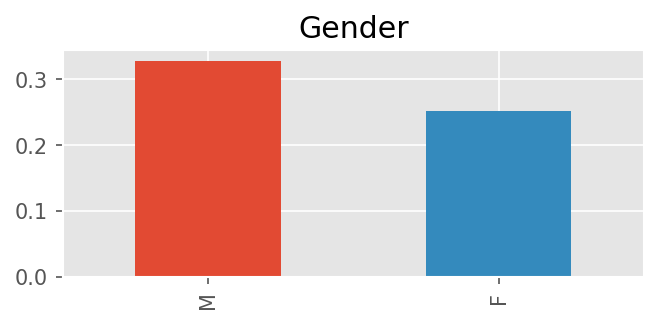

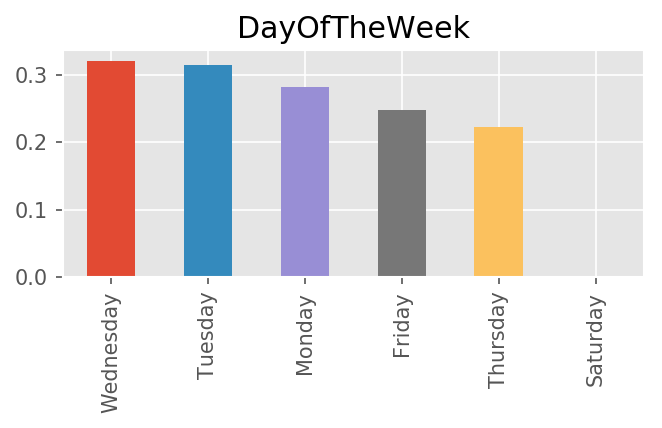

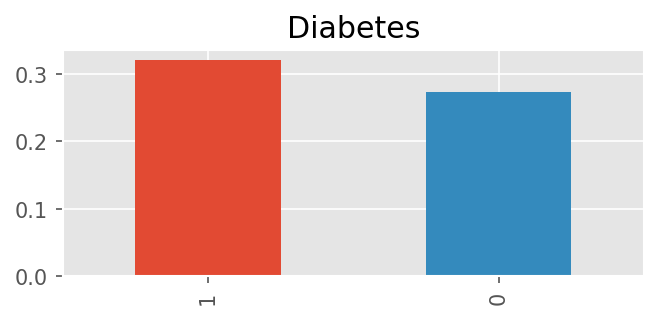

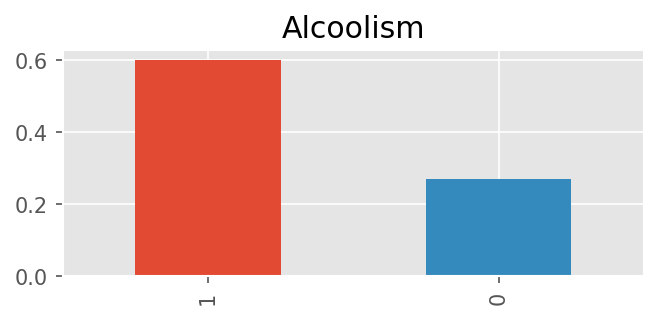

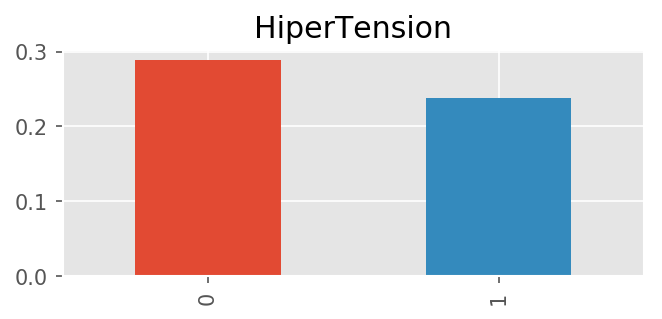

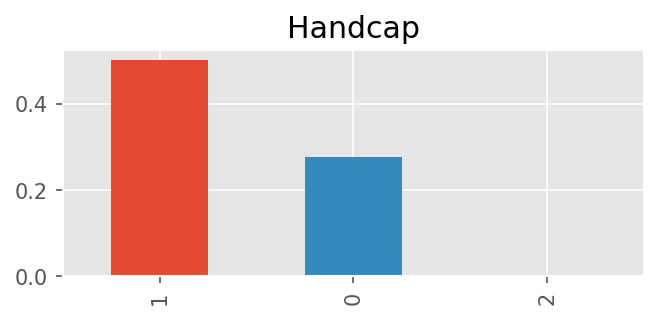

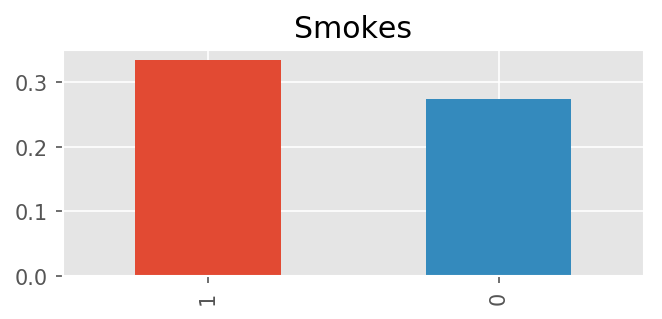

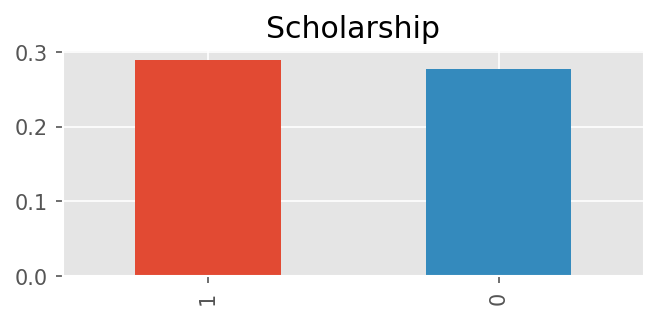

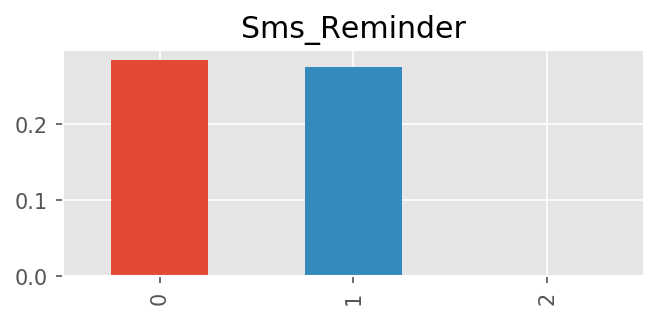

In [520]:
###各変数ごとのno-showを算出

for data in feature_names_list:
    rate = df[df['Status']==1][data].value_counts(sort=False).sort_index()/df[data].value_counts(sort=False).sort_index()
    fig = plt.figure(figsize=(5,2),dpi=150)
    rate.sort_values(ascending=False).plot(kind='bar',title=data)
    
    

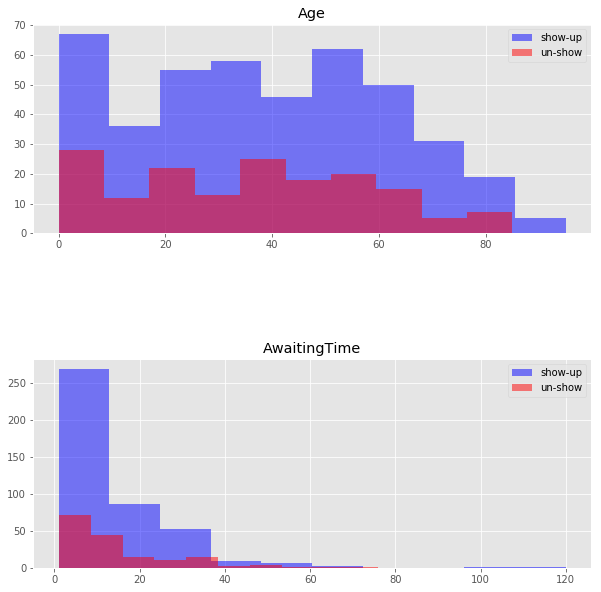

In [521]:
###連続値をもった変数のヒストグラム
df_1 = df.loc[:,['Age','AwaitingTime']]
name = list(df_1.columns)


plt.figure(figsize = (10, 10))
i = 1
for feature_name in name:
    plt.subplot(2, 1, i)
    df_hist = df.loc[:, [feature_name, 'Status']].dropna(how = 'any', axis = 0)
    plt.hist(df_hist.loc[df_hist['Status']==0, feature_name], color = 'b', alpha = 0.5, label = 'show-up')
    plt.hist(df_hist.loc[df_hist['Status']==1, feature_name], color = 'r', alpha = 0.5, label = 'un-show') 
    plt.title(feature_name)
    plt.legend(loc = 'upper right')
    plt.subplots_adjust(wspace=0.3, hspace=0.6)
    i += 1
plt.show()

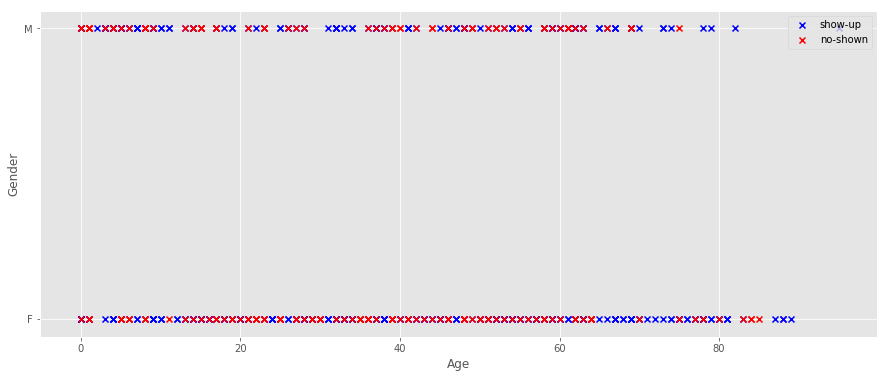

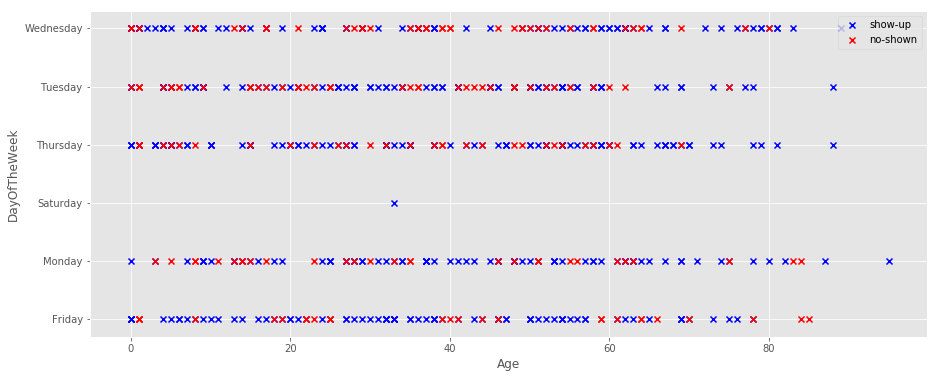

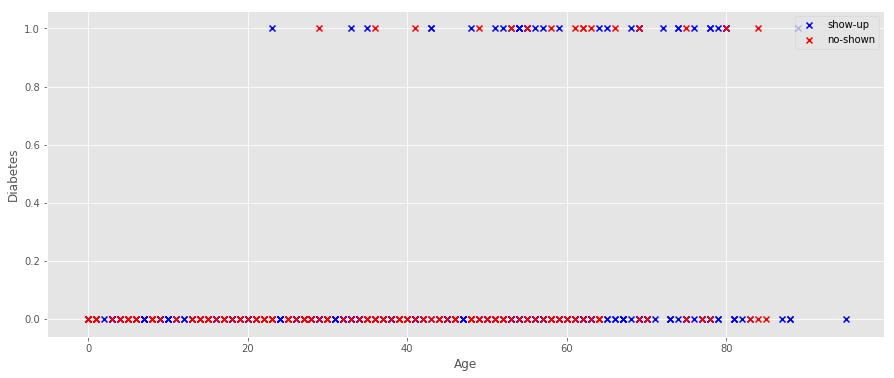

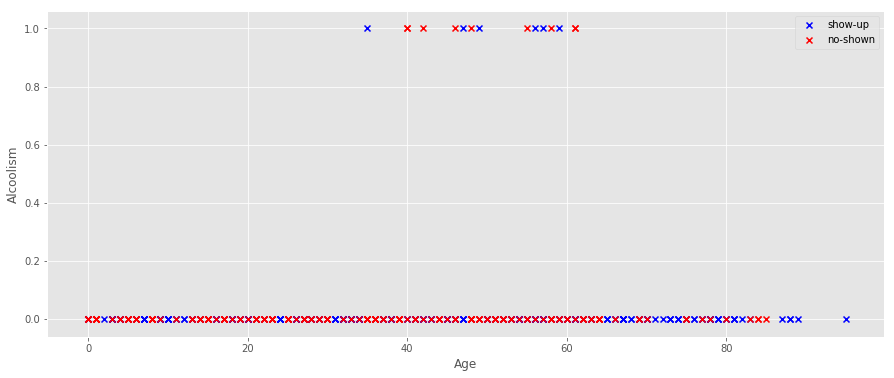

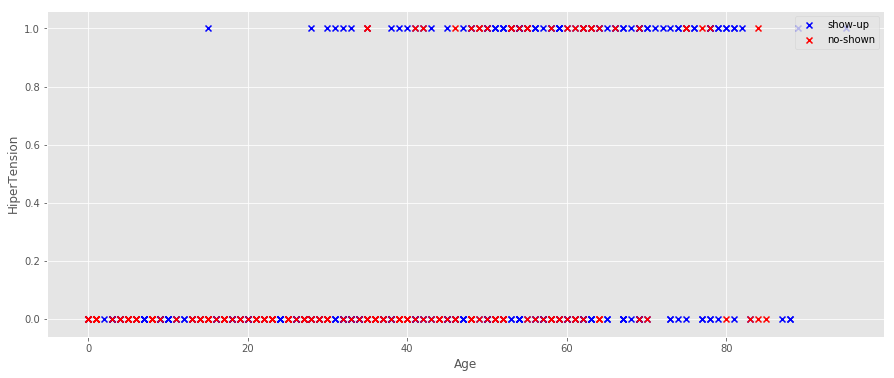

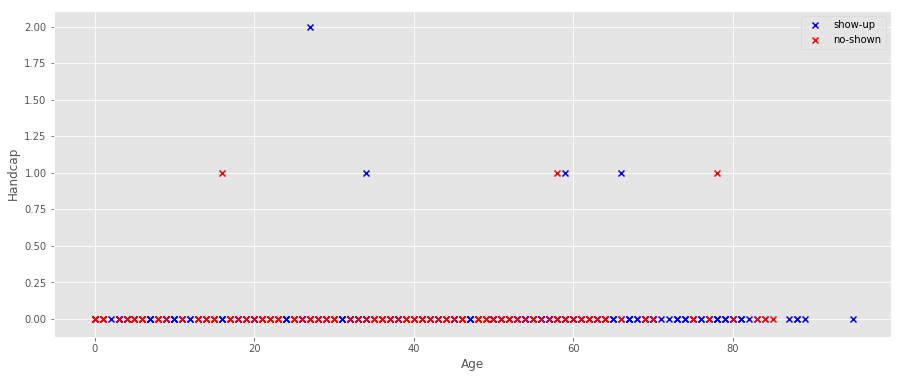

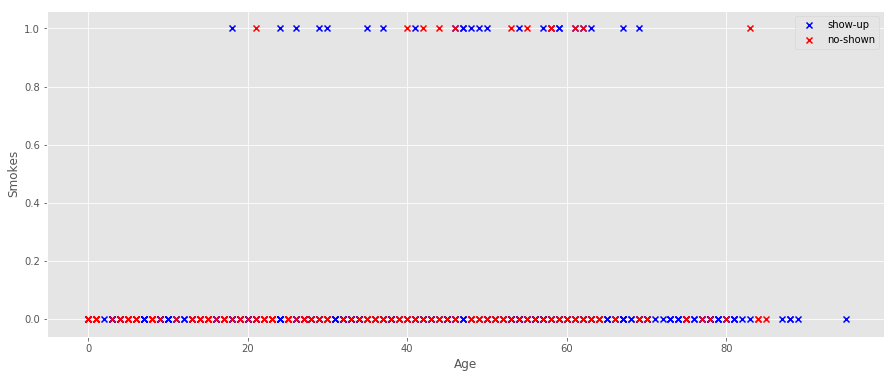

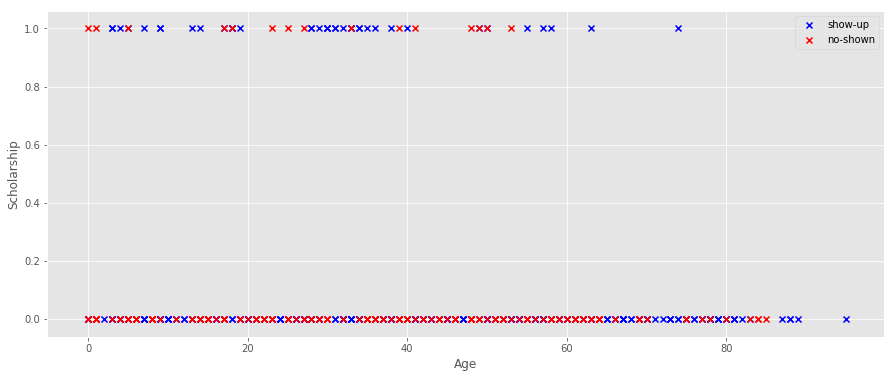

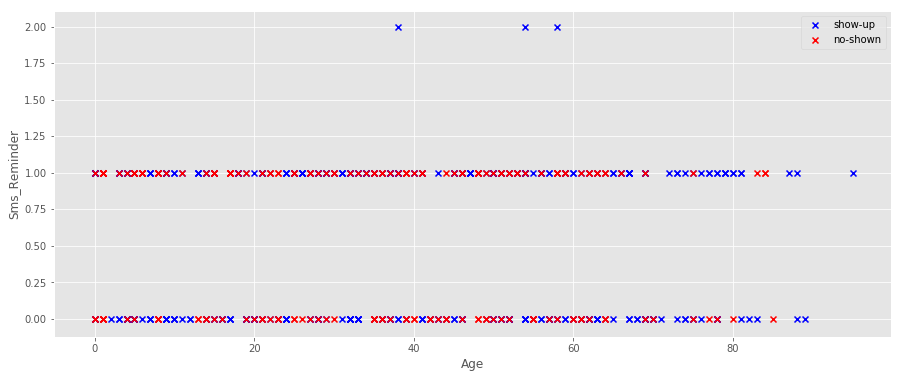

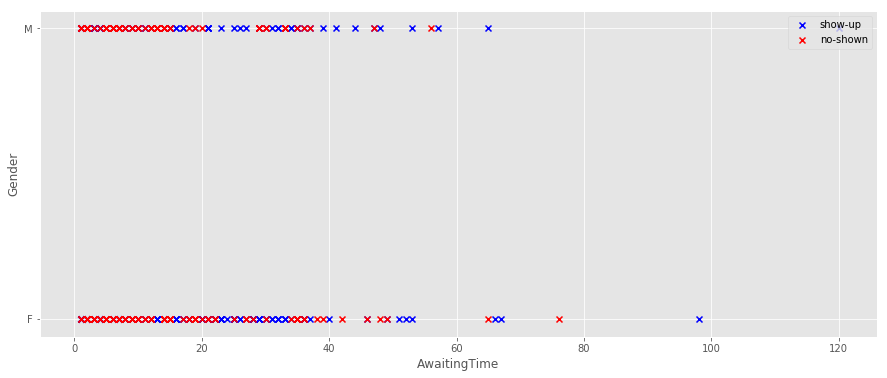

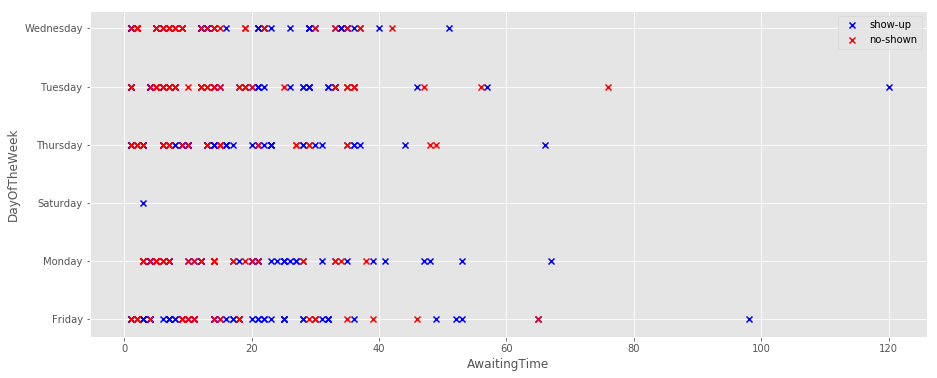

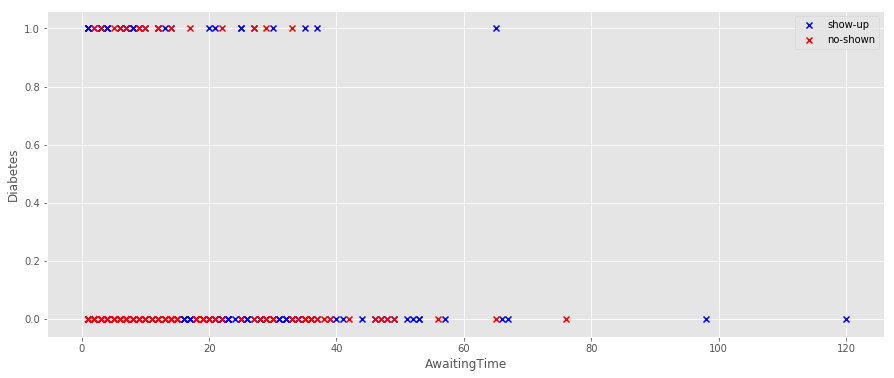

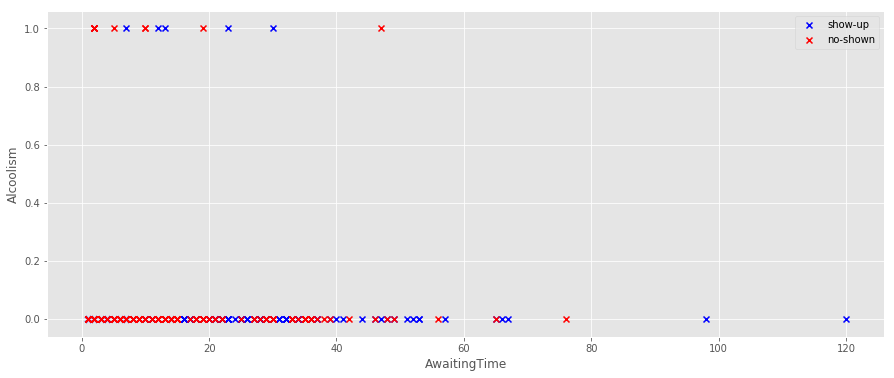

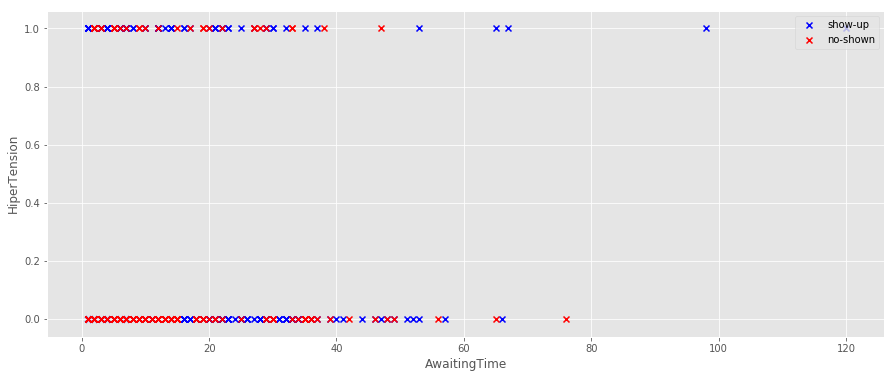

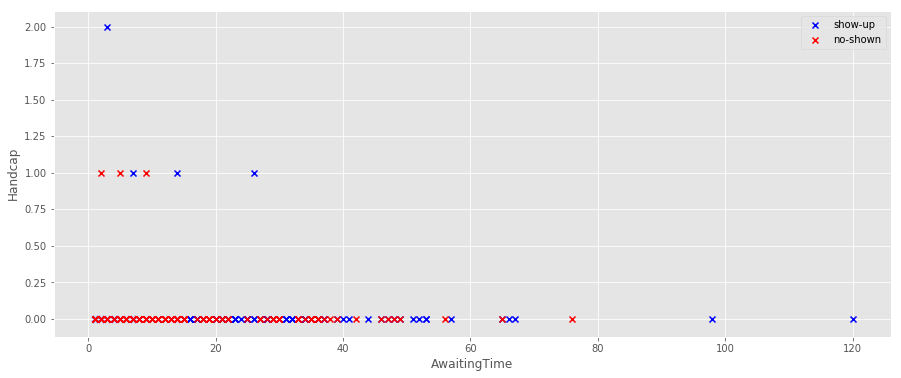

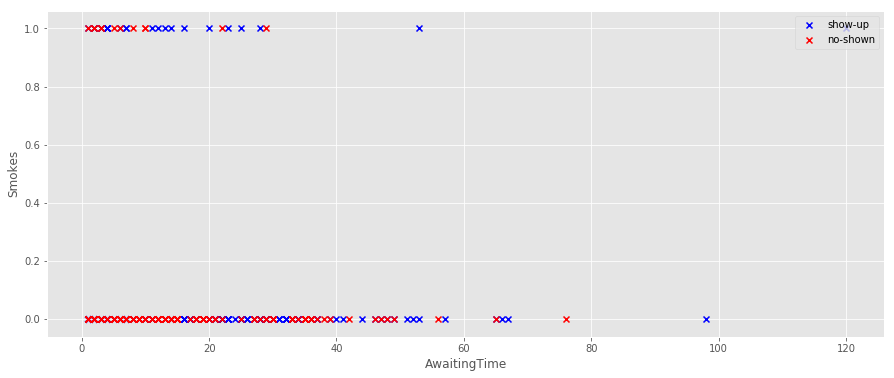

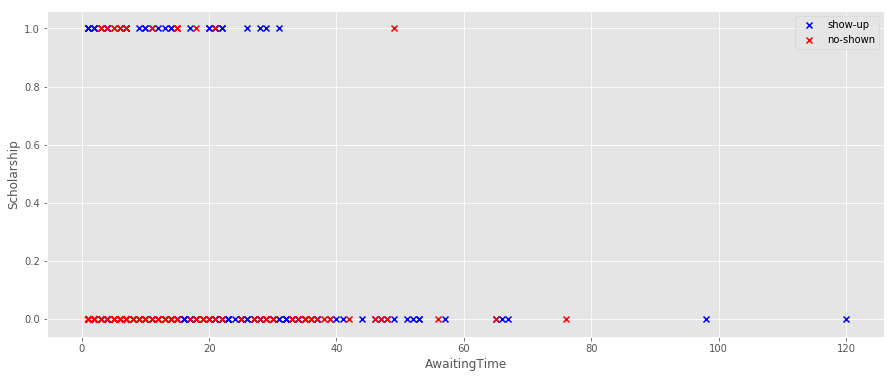

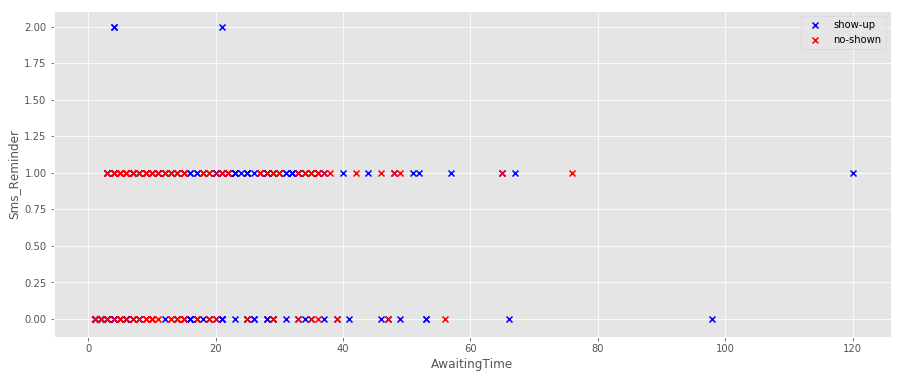

In [522]:
for name1 in name:
    for name2 in list(df_data.columns):
        plt.figure(figsize=(15,6))
        plt.scatter(df[df['Status']==0][str(name1)], df[df['Status']==0][str(name2)],color='blue',marker='x'
                   ,label='show-up')
        plt.scatter(df[df['Status']==1][str(name1)],df[df['Status']==1][str(name2)],color='red',marker='x',
                   label='no-shown')
        plt.xlabel(name1)
        plt.ylabel(name2)
        plt.legend(loc = 'upper right')
        plt.show()
        i = i + 1
    

In [523]:
DayOfTheWeek = pd.get_dummies(df['DayOfTheWeek'])
gender = pd.get_dummies(df['Gender'])
df = pd.concat([df,gender],axis=1)
df = pd.concat([df,DayOfTheWeek],axis=1)
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,...,Sms_Reminder,AwaitingTime,F,M,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,0,0,0,0,0,...,0,29,0,1,0,0,0,0,0,1
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,0,0,0,0,0,...,1,15,0,1,0,0,0,1,0,0
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,0,0,0,0,0,...,1,6,0,1,0,0,0,0,1,0


In [524]:
df['AwaitingTime'] = df['AwaitingTime'].where(df['AwaitingTime']<90)
df.isnull().sum()
df = df.fillna(df.mean())

In [525]:
df = df.drop(['Tuberculosis'],axis=1)
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,...,Sms_Reminder,AwaitingTime,F,M,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,0,0,0,0,0,...,0,29.0,0,1,0,0,0,0,0,1
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,0,0,0,0,0,...,0,1.0,1,0,0,0,0,0,0,1
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,0,0,0,0,0,...,0,1.0,1,0,0,0,0,0,1,0
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,0,0,0,0,0,...,1,15.0,0,1,0,0,0,1,0,0
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,0,0,0,0,0,...,1,6.0,0,1,0,0,0,0,1,0


In [526]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,...,Sms_Reminder,AwaitingTime,F,M,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,0,0,0,0,0,...,0,29.0,0,1,0,0,0,0,0,1
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,0,0,0,0,0,...,0,1.0,1,0,0,0,0,0,0,1
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,0,0,0,0,0,...,0,1.0,1,0,0,0,0,0,1,0
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,0,0,0,0,0,...,1,15.0,0,1,0,0,0,1,0,0
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,0,0,0,0,0,...,1,6.0,0,1,0,0,0,0,1,0


In [527]:
X = df.drop(['AppointmentRegistration', 'ApointmentData','Handcap','Smokes','Status','Gender','DayOfTheWeek'],axis=1)
y = df['Status']

In [528]:
X.isnull().sum()

Age             0
Diabetes        0
Alcoolism       0
HiperTension    0
Scholarship     0
Sms_Reminder    0
AwaitingTime    0
F               0
M               0
Friday          0
Monday          0
Saturday        0
Thursday        0
Tuesday         0
Wednesday       0
dtype: int64

In [529]:
random_state = 0
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [530]:
X_train.head()

,Age,Diabetes,Alcoolism,HiperTension,Scholarship,Sms_Reminder,AwaitingTime,F,M,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
186,69,0,0,1,0,0,12.0,1,0,0,1,0,0,0,0
355,67,0,0,1,0,1,17.0,0,1,0,0,0,1,0,0
376,46,0,0,0,0,1,9.0,0,1,1,0,0,0,0,0
140,3,0,0,0,0,1,12.0,0,1,0,0,0,0,0,1
580,16,0,0,0,0,0,1.0,1,0,1,0,0,0,0,0


In [531]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [532]:
param_grid = {'n_estimators':[900,1000,1100], 'max_depth':[2,3,4,5]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=random_state),param_grid,cv=5,scoring='roc_auc').fit(X_train,y_train)


print('trainデータのスコア{}'.format(grid_search.score(X_train, y_train)))
print('テストデータのスコア{}'.format(grid_search.score(X_test, y_test)))
print("best_params:{}".format(grid_search.best_params_))



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


trainデータのスコア0.723818363979255
テストデータのスコア0.5694818808026355
best_params:{'max_depth': 2, 'n_estimators': 1100}


In [533]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf_cv = GridSearchCV(clf,{'max_depth':[1,2,3,4,5],
                          'n_estimators':[100,200,400,700,],
                          'min_child_weight':[5,7,10,15]})
clf_cv.fit(X_train,y_train)
print('trainデータのスコア{}'.format(clf_cv.score(X_train, y_train)))
print('テストデータのスコア{}'.format(clf_cv.score(X_test, y_test)))
print("best_params:{}".format(clf_cv.best_params_))



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


trainデータのスコア0.744578313253012
テストデータのスコア0.6871508379888268
best_params:{'max_depth': 1, 'min_child_weight': 10, 'n_estimators': 400}


In [534]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

# データセットの分割
from sklearn.model_selection import train_test_split
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.3, random_state=0)

# ロジスティック回帰の実行
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=3.0)
lr.fit(X_train, y_train)

# 正答率を出力
print('train acc: %.3f' % lr.score(X_train, y_train))
print('test acc: %.3f' % lr.score(X_test, y_test))

train acc: 0.742
test acc: 0.698


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [535]:
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

from sklearn.svm import SVC
gs_svc = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kf_5)

gs_svc.fit(X_train_std, y_train_std)
print(gs_svc.best_params_)
print(gs_svc.best_score_)
print(gs_svc.score(X_test_std, y_test_std))

{'C': 1.0, 'gamma': 0.1}
0.7349397590361446
0.6815642458100558


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [536]:
!pip install LightGBM

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [537]:
import lightgbm as lgb

In [538]:
gbm_param = {
    'learning_rate':[0.08,0.09,0.1],
    'n_estimators':[10,50,100,200],
    'max_depth':[2,3,5,7,9],
    'min_child_weight':[0.6,0.7,0.8],
    'subsample':[0.8],
    'colsample_bytree':[0.8]
    }
lgb_cv = GridSearchCV(lgb.LGBMClassifier(random_state=random_state), gbm_param,cv=5,scoring='roc_auc')
lgb_cv.fit(X_train,y_train)
print('trainデータのスコア{}'.format(lgb_cv.score(X_train, y_train)))
print('テストデータのスコア{}'.format(lgb_cv.score(X_test, y_test)))
print("best_params:{}".format(lgb_cv.best_params_))



trainデータのスコア0.8323314474304573
テストデータのスコア0.5692572626534891
best_params:{'colsample_bytree': 0.8, 'learning_rate': 0.09, 'max_depth': 2, 'min_child_weight': 0.6, 'n_estimators': 200, 'subsample': 0.8}


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [539]:
df['Month'] = df['ApointmentData'].astype(str).str[5:7]
df['Day'] = df['ApointmentData'].astype(str).str[8:10]
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,...,F,M,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Month,Day
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,0,0,0,0,0,...,0,1,0,0,0,0,0,1,01,14
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,0,0,0,0,0,...,1,0,0,0,0,0,0,1,08,19
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,0,0,0,0,0,...,1,0,0,0,0,0,1,0,02,18
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,0,0,0,0,0,...,0,1,0,0,0,1,0,0,08,07
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,0,0,0,0,0,...,0,1,0,0,0,0,1,0,10,27


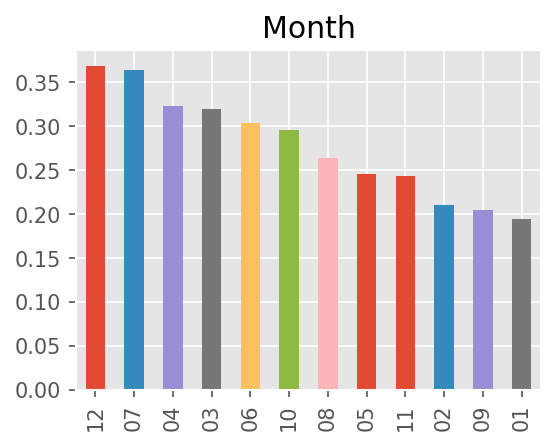

In [540]:
rate = df[df['Status']==1]['Month'].value_counts(sort=False).sort_index()/df['Month'].value_counts(sort=False).sort_index()
fig = plt.figure(figsize=(4,3),dpi=150)
rate.sort_values(ascending=False).plot(kind='bar',title='Month')
    
    

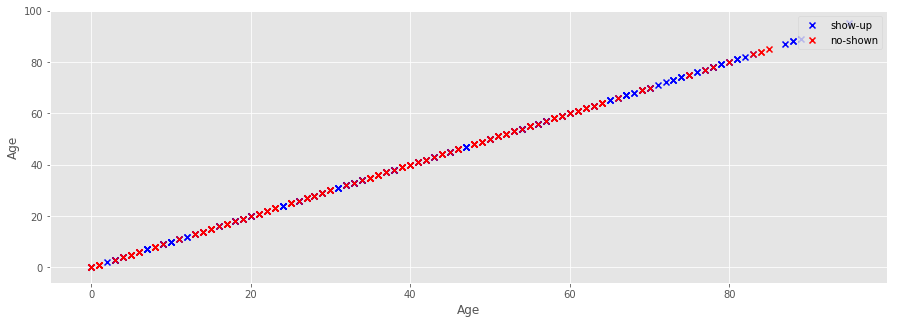

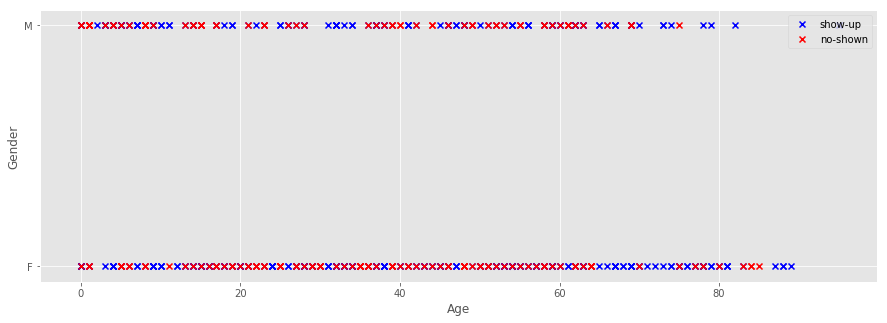

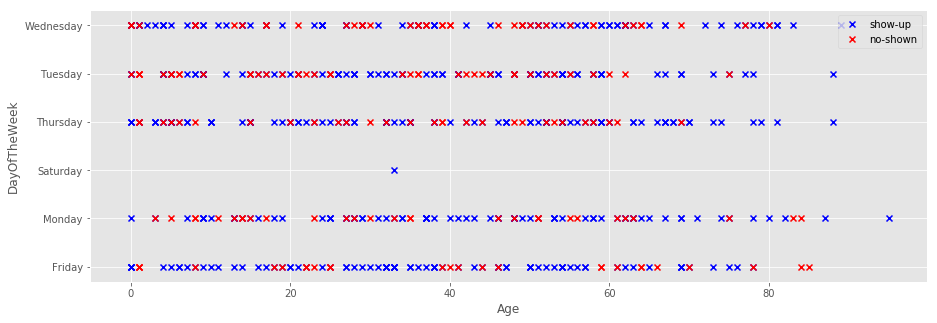

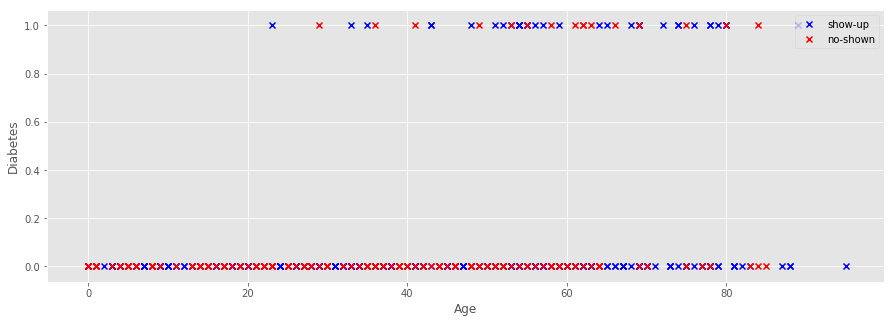

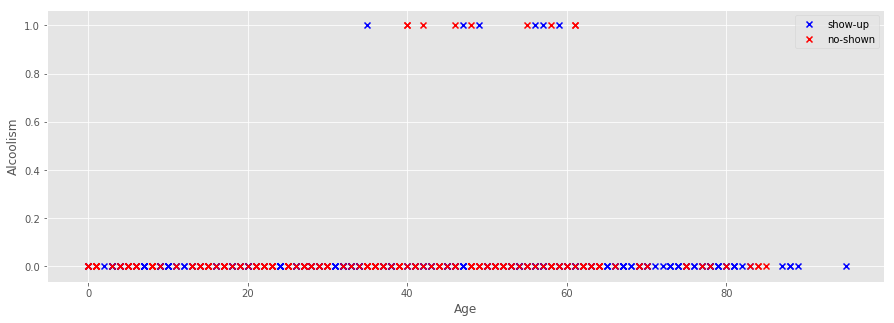

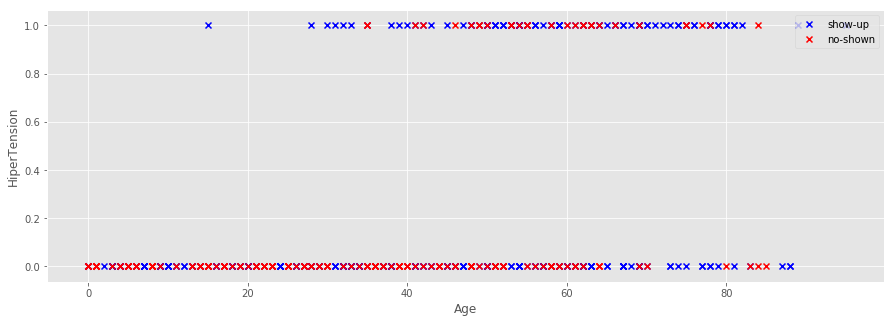

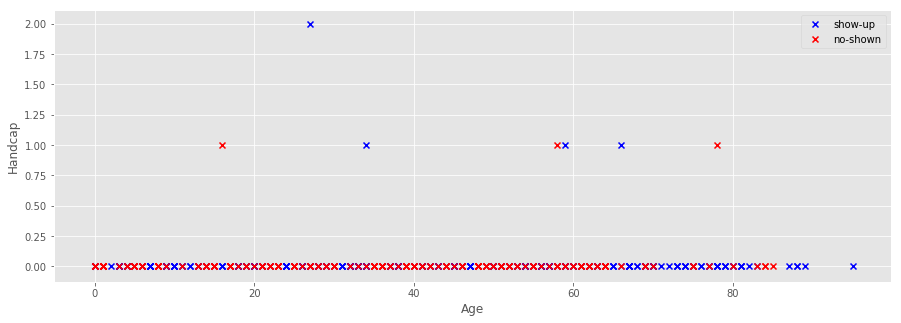

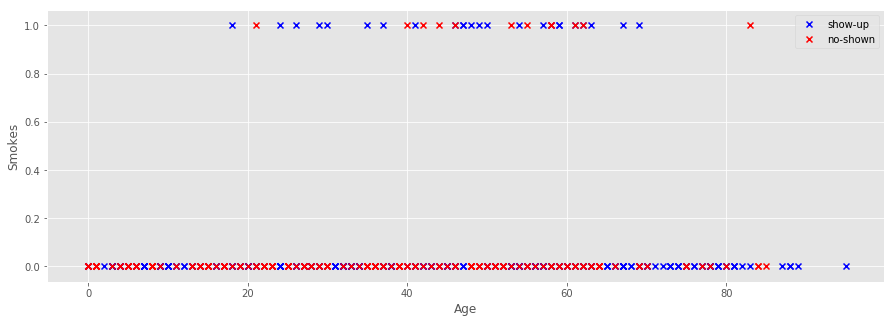

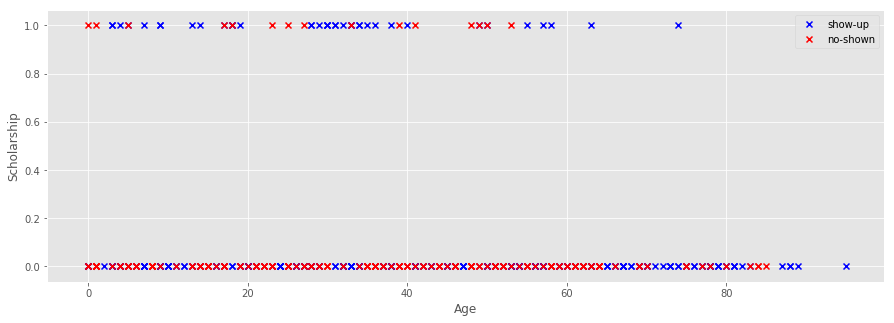

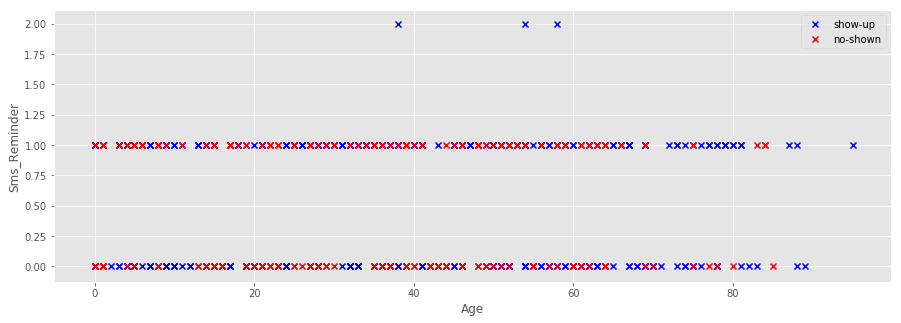

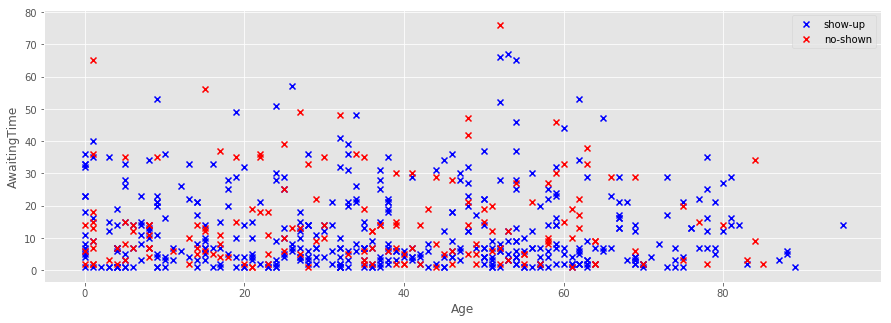

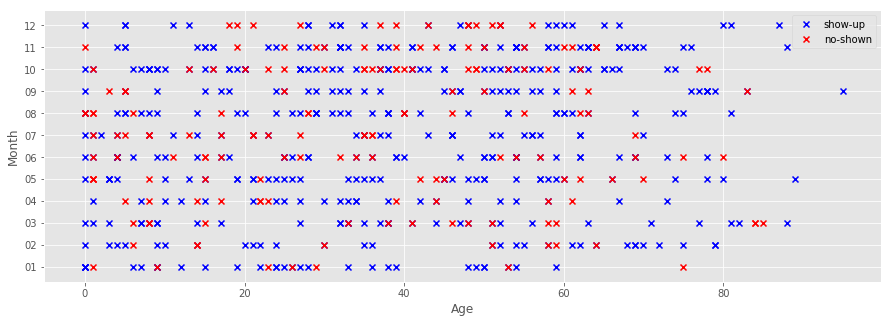

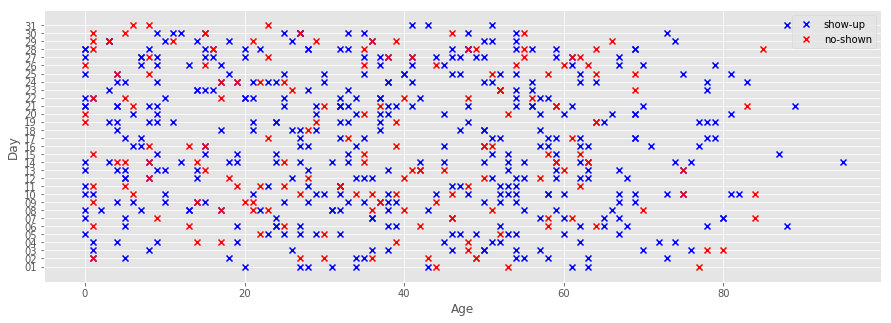

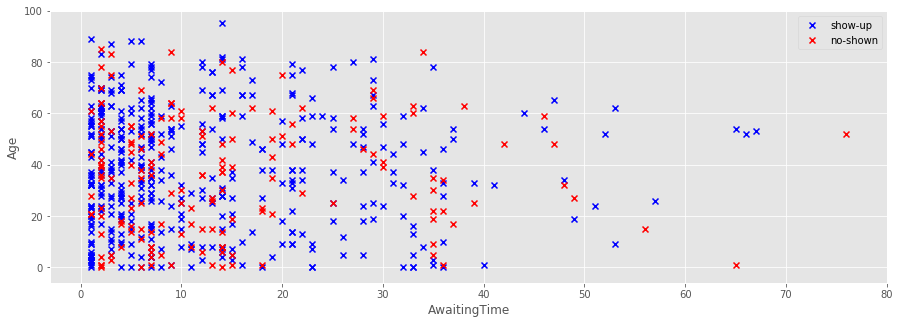

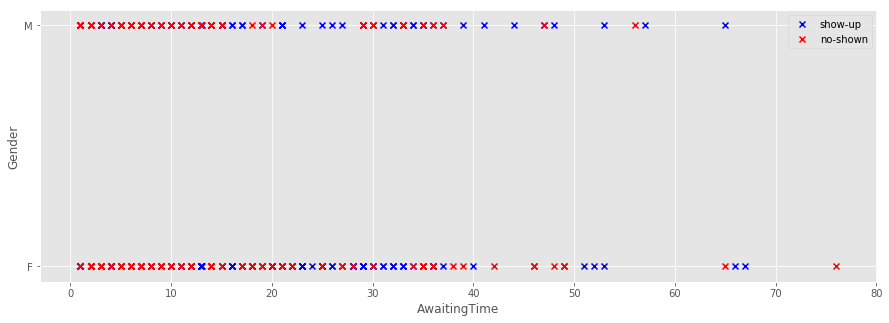

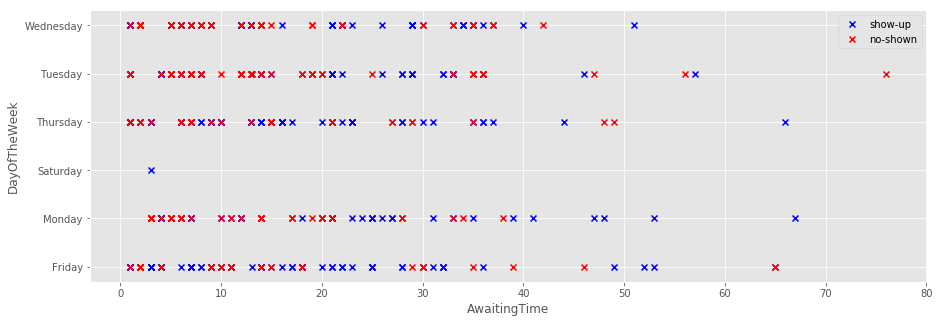

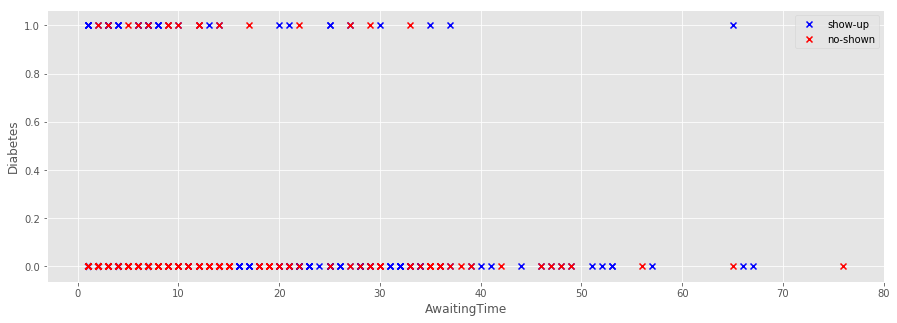

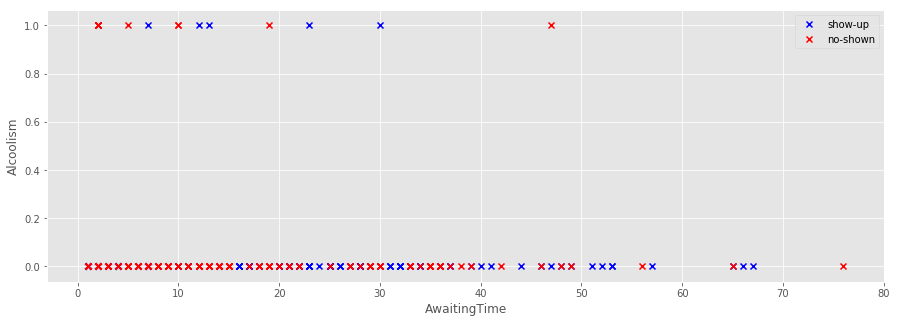

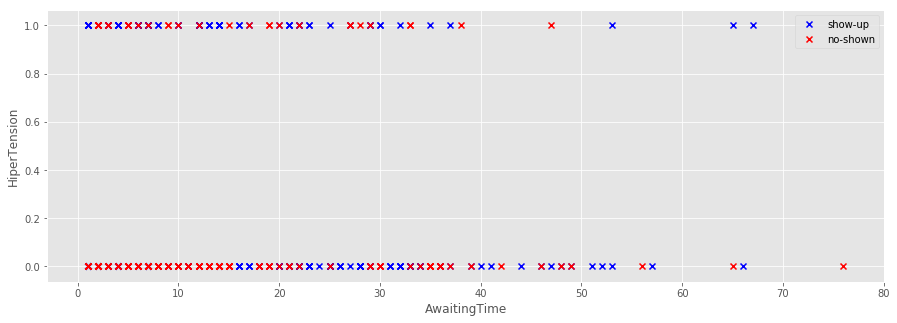

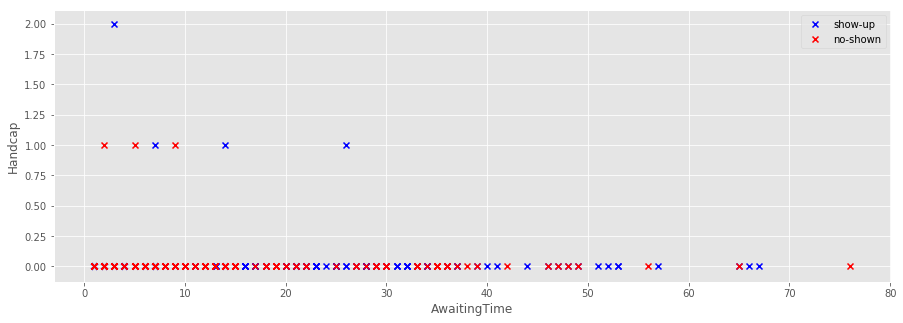

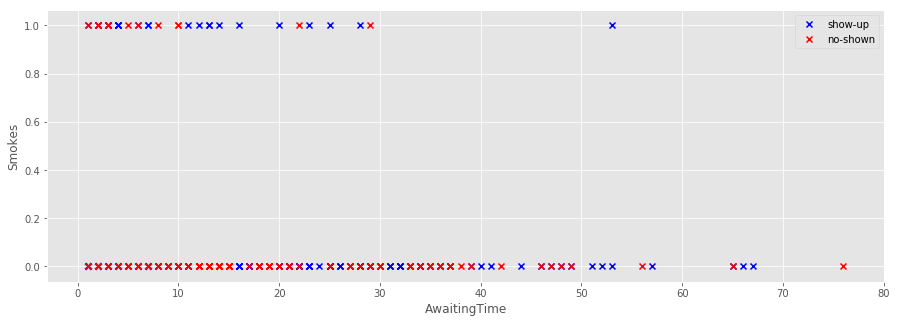

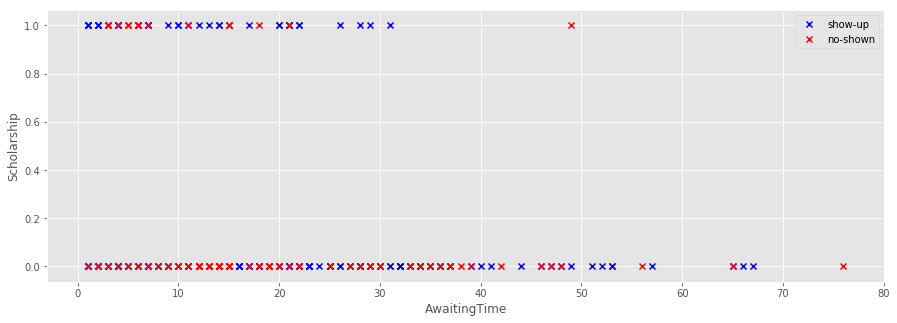

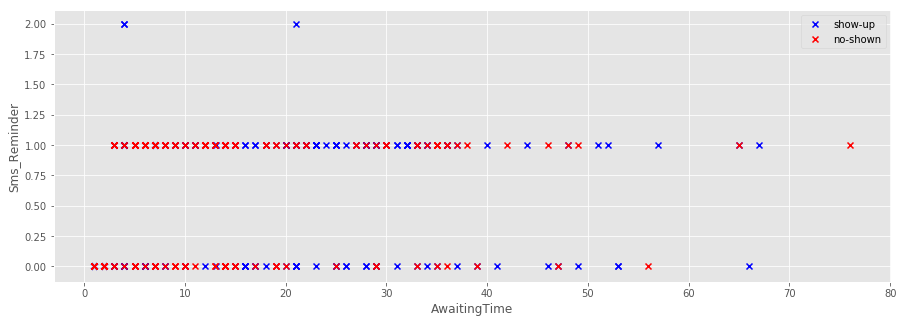

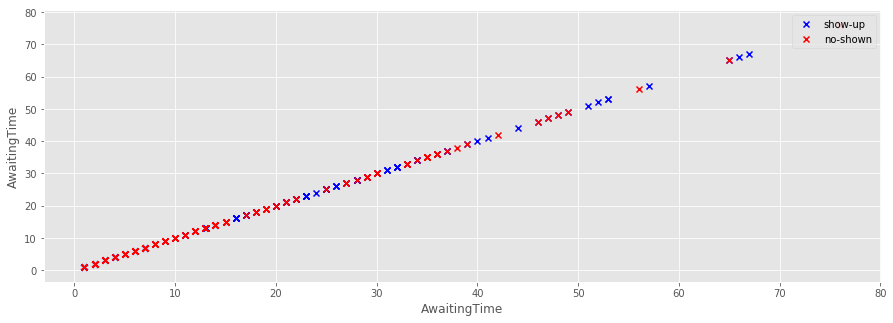

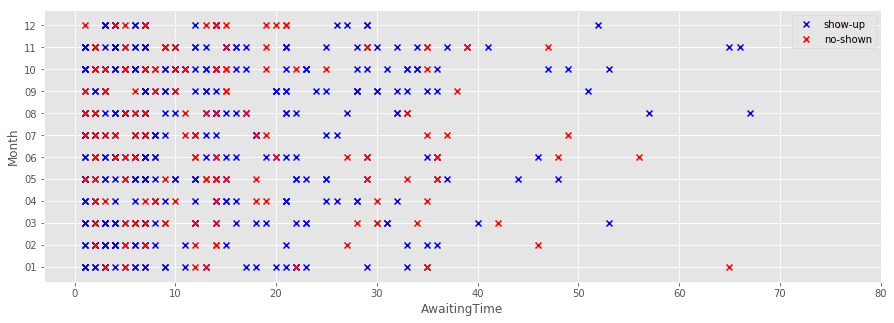

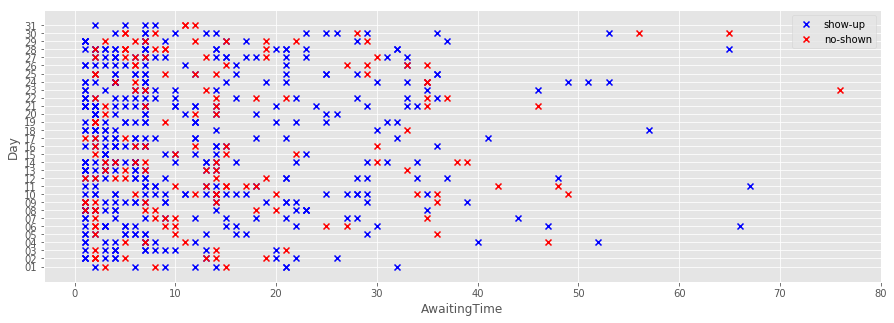

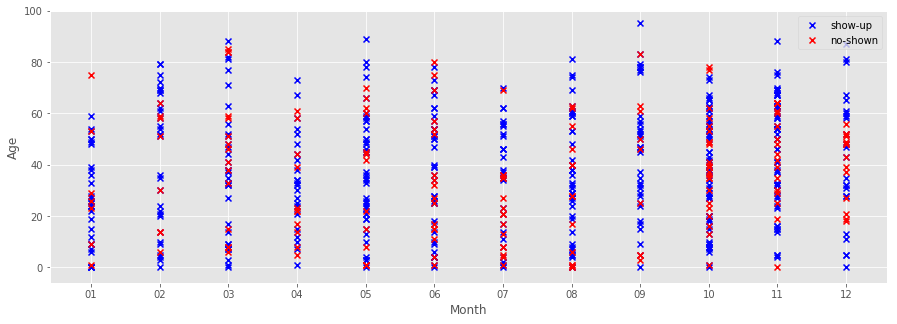

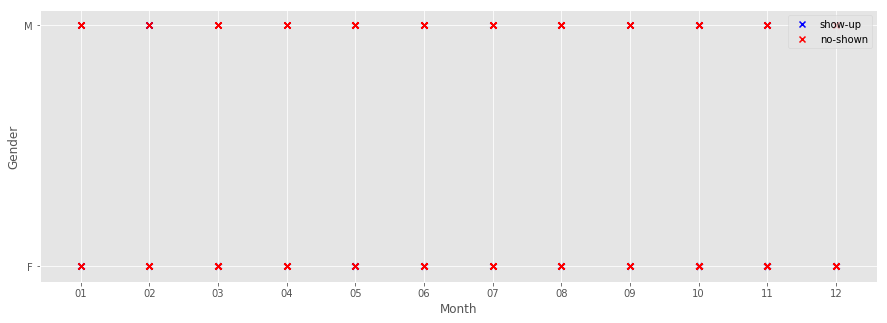

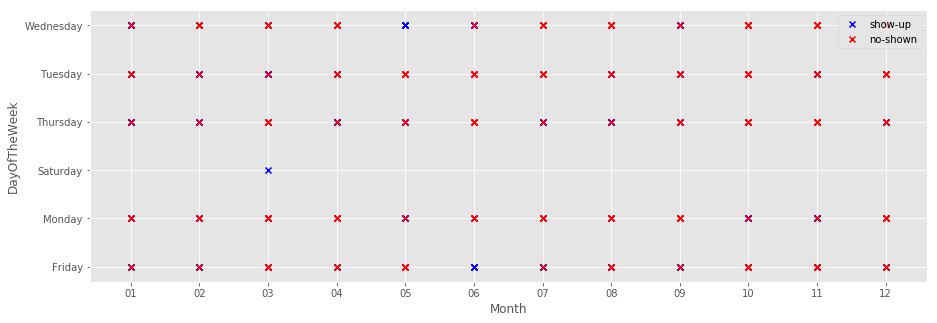

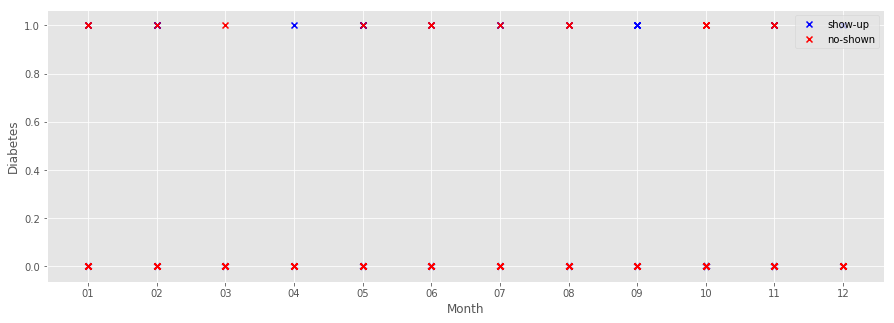

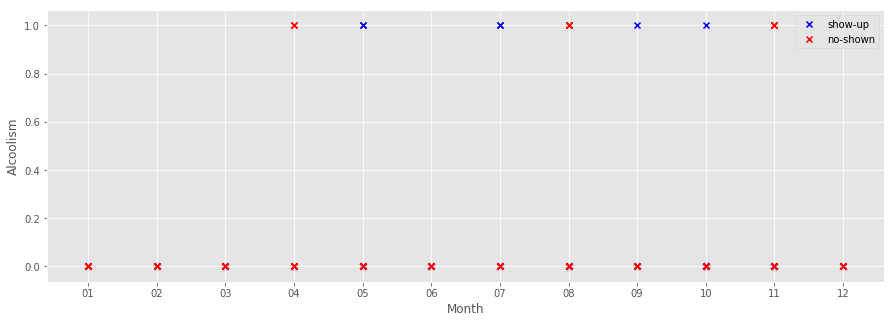

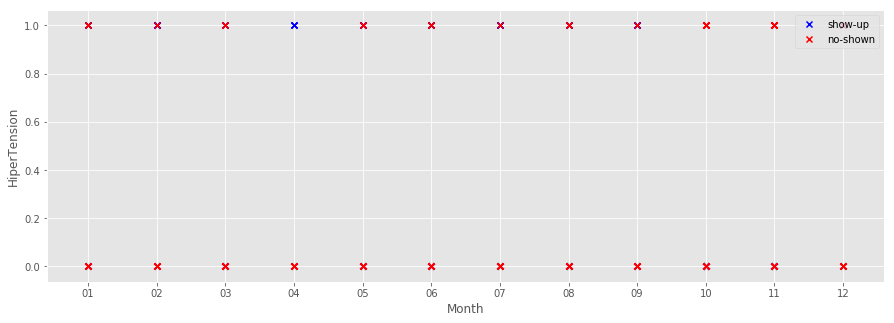

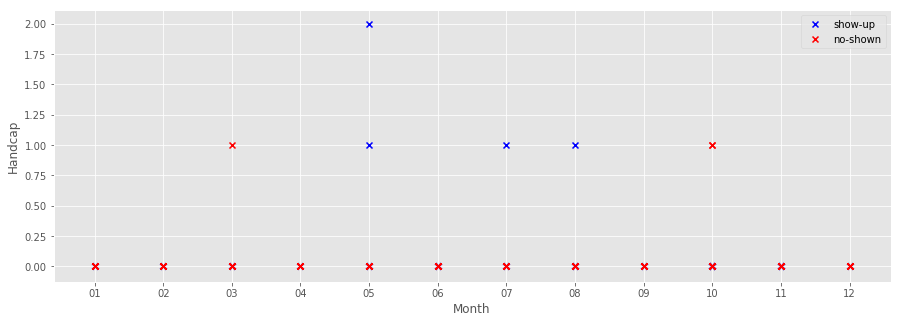

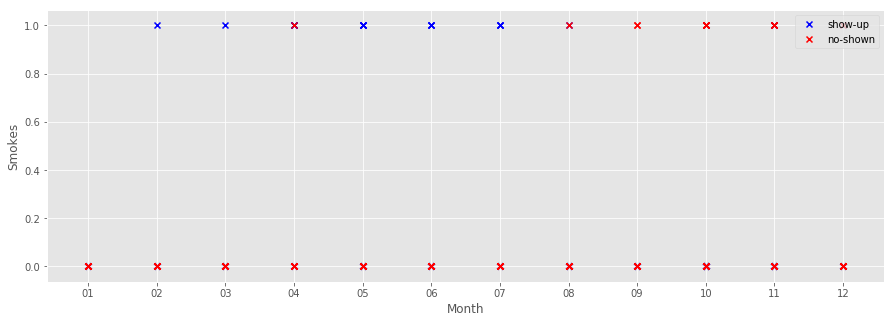

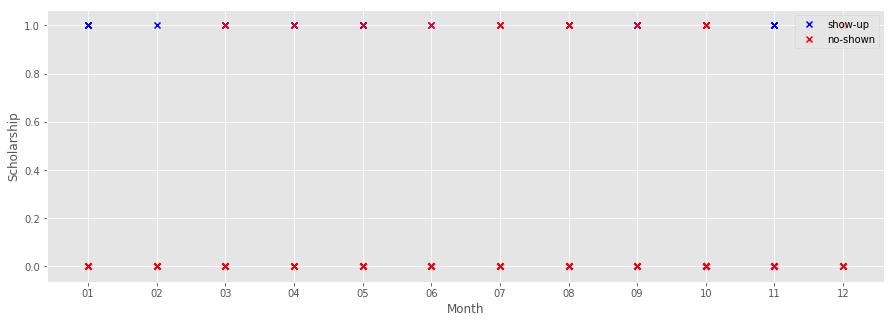

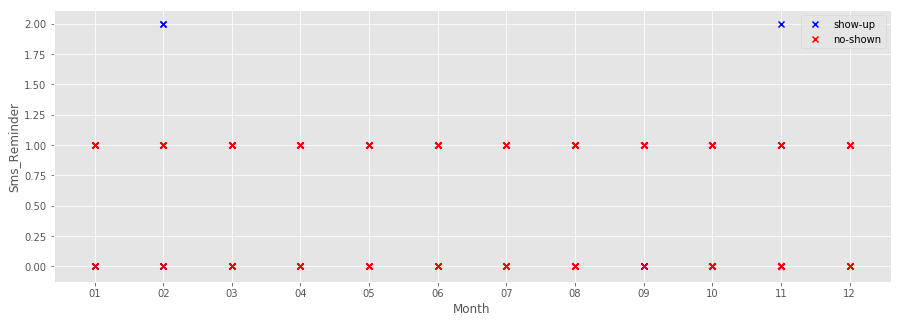

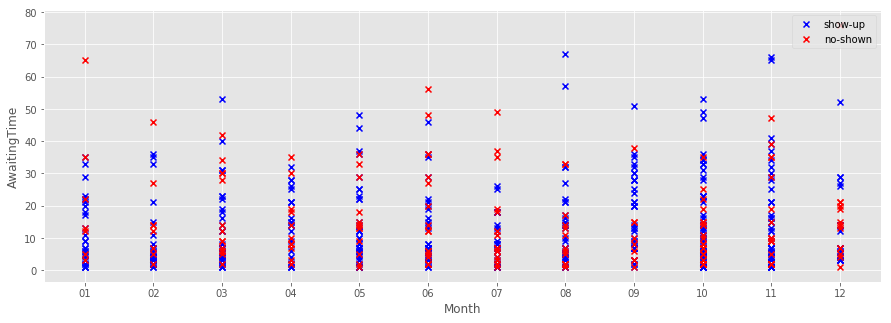

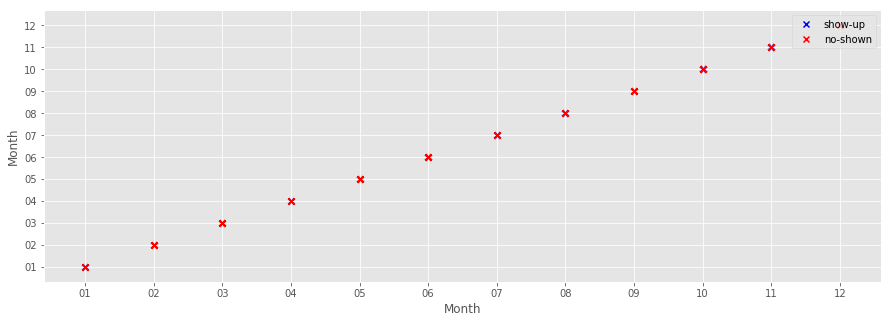

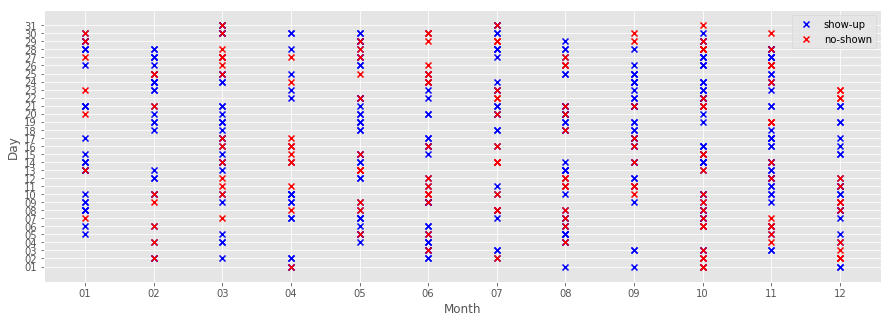

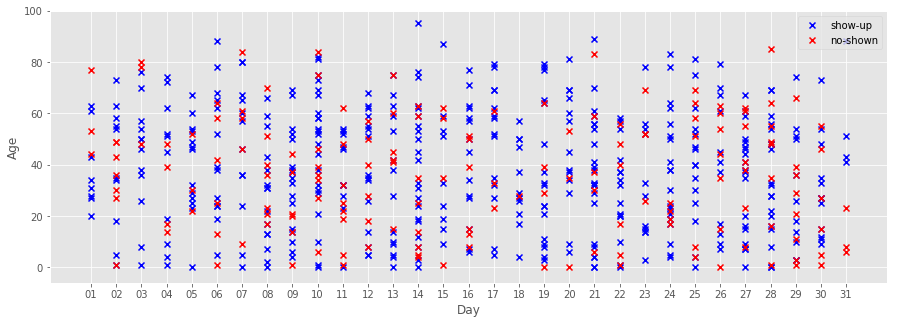

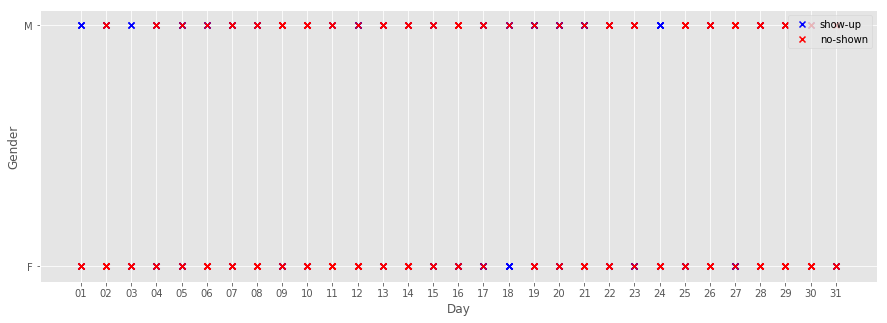

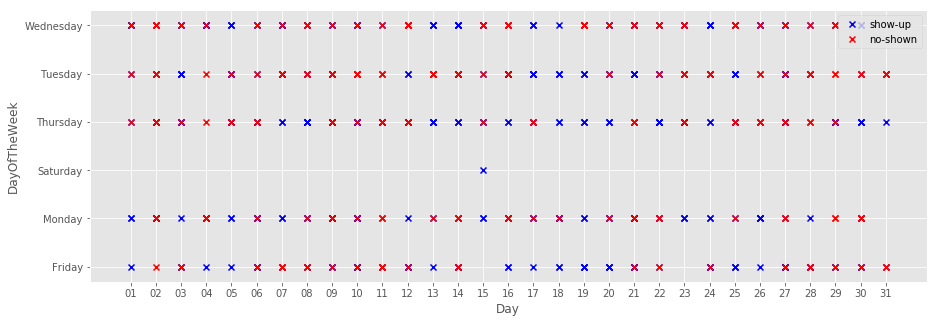

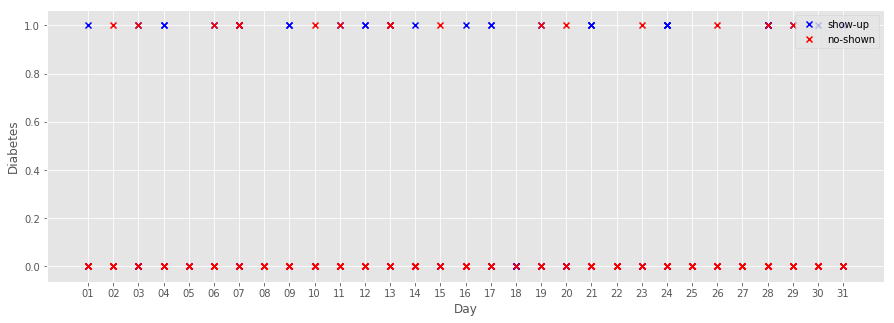

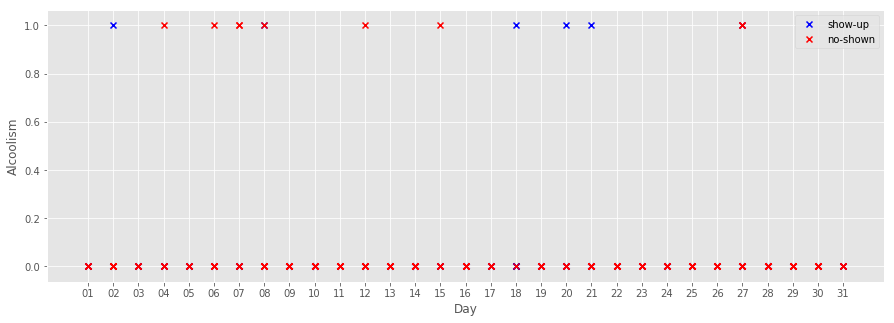

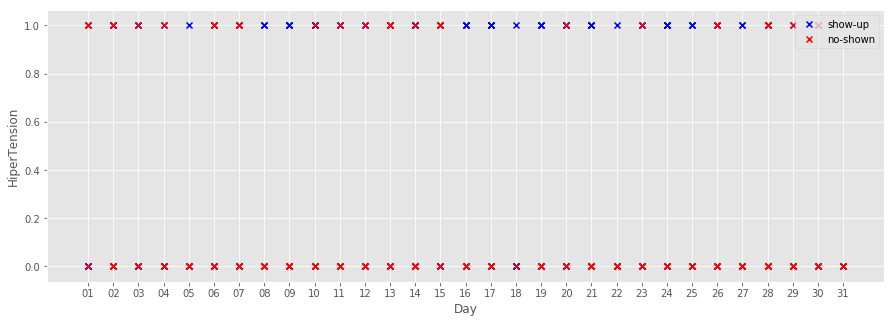

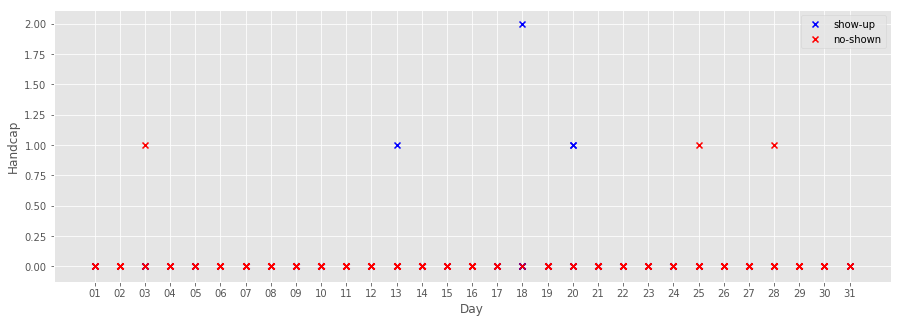

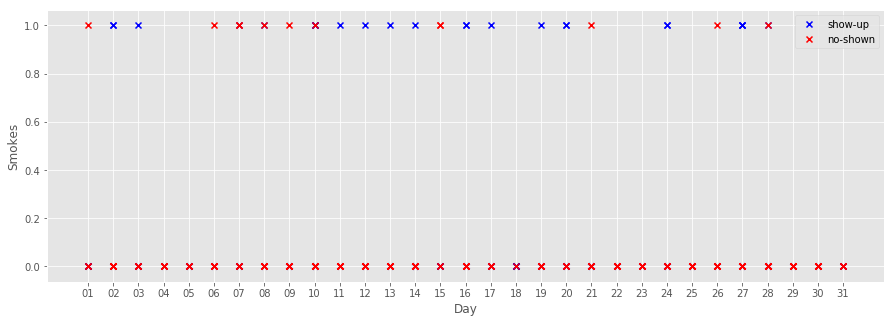

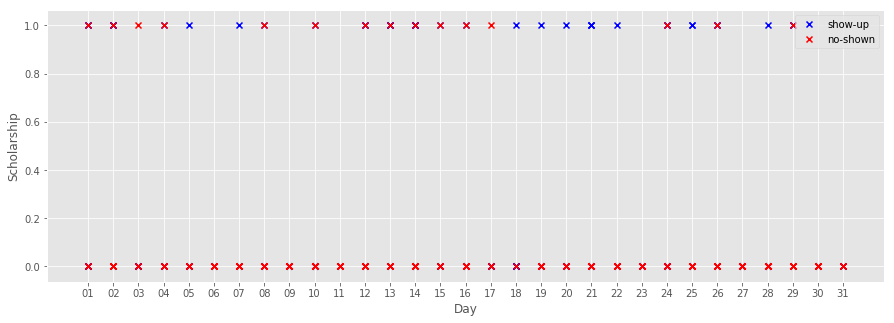

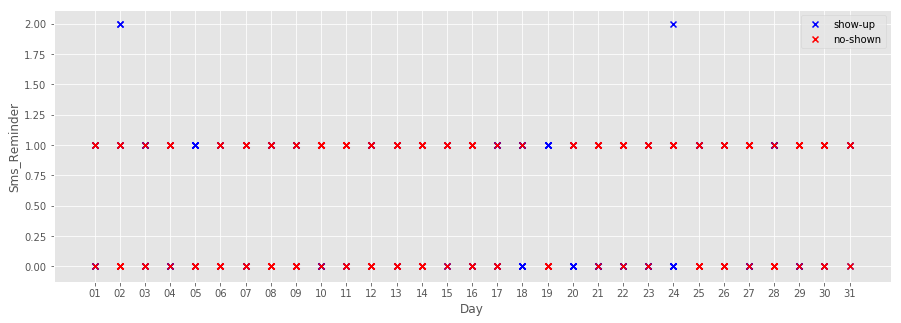

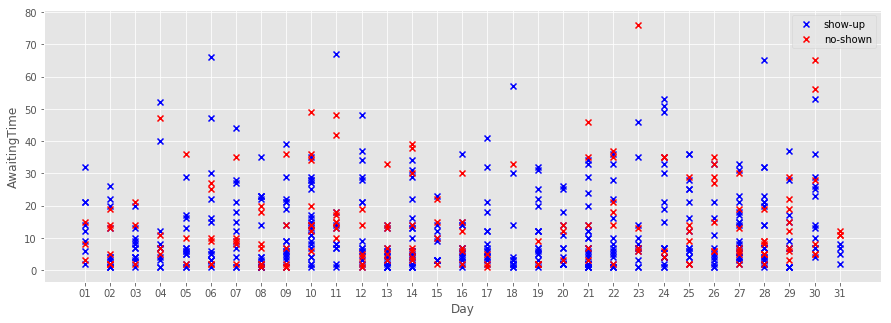

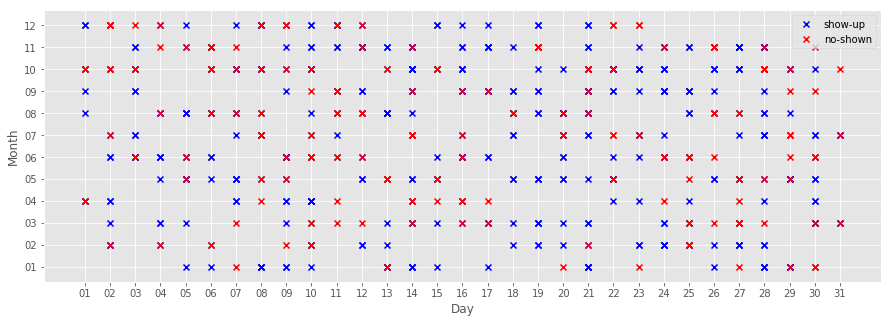

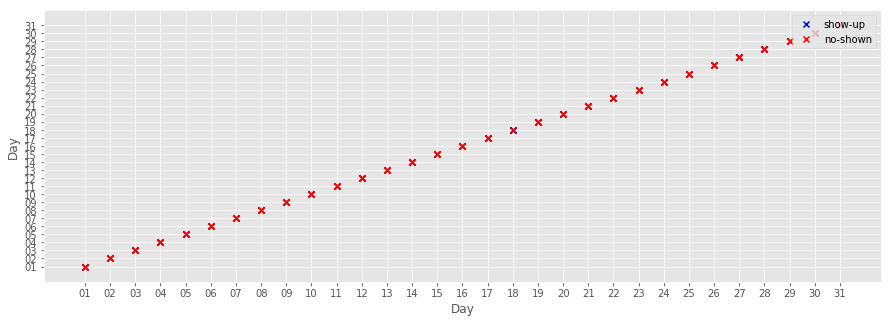

In [541]:
df_map = df.drop(['Status','F','M','Friday','Monday','Saturday','Thursday','Tuesday','Wednesday','AppointmentRegistration','ApointmentData'],axis=1)
df_scatter = df[['Age','AwaitingTime','Month','Day']]
for name1 in list(df_scatter.columns):
    for name2 in list(df_map.columns):
        plt.figure(figsize=(15,5))
        plt.scatter(df[df['Status']==0][str(name1)], df[df['Status']==0][str(name2)],color='blue',marker='x'
                   ,label='show-up')
        plt.scatter(df[df['Status']==1][str(name1)],df[df['Status']==1][str(name2)],color='red',marker='x',
                   label='no-shown')
        plt.xlabel(name1)
        plt.ylabel(name2)
        plt.legend(loc = 'upper right')
        plt.show()
        i = i + 1
    

In [542]:
month_mapping = {'12':4, '07':4, '04':3, '03':3, '06':3, '10':3, '08':2, '05':2, '11':2, '02':1, '09':1, '01':1}
df['Month'] = df['Month'].map(month_mapping)
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,...,F,M,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Month,Day
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,14
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,0,0,0,0,0,...,1,0,0,0,0,0,0,1,2,19
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,18
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2,07
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,0,0,0,0,0,...,0,1,0,0,0,0,1,0,3,27


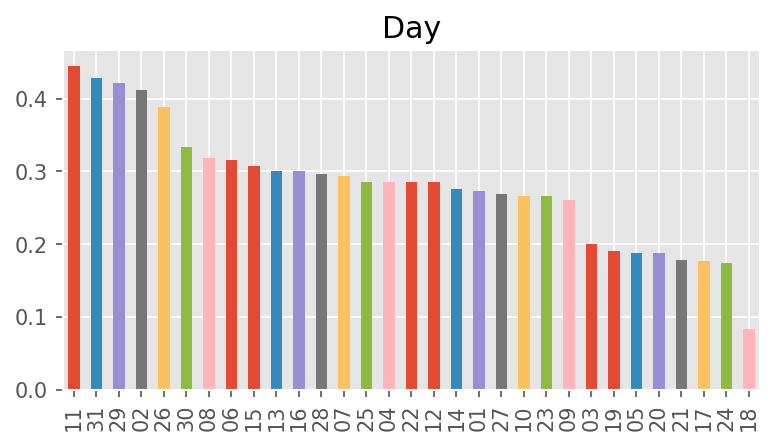

In [543]:
rate = df[df['Status']==1]['Day'].value_counts(sort=False).sort_index()/df['Day'].value_counts(sort=False).sort_index()
fig = plt.figure(figsize=(6,3),dpi=150)
rate.sort_values(ascending=False).plot(kind='bar',title='Day')
    
    

In [544]:
day_mapping = {'11':3, '31':3, '29':3, '29':3, '02':3, '26':3, '30':2, '08':2, '06':2, '15':2, '13':2, '16':2, '28':2,
               '28':2, '07':2, '25':2, '04':2, '22':2, '12':2, '14':2, '14':2, '01':2, '27':2, '10':2, '23':2, '09':2, 
               '03':1, '19':1, '05':1, '20':1, '21':1, '17':1, '24':1, '18':0}
df['Day'] = df['Day'].map(day_mapping)
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,...,F,M,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Month,Day
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,2
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,0,0,0,0,0,...,1,0,0,0,0,0,0,1,2,1
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2,2
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,0,0,0,0,0,...,0,1,0,0,0,0,1,0,3,2


In [545]:
print(df['Month'].value_counts())
print(df['Day'].value_counts())

3    218
2    176
1    118
4     82
Name: Month, dtype: int64
2    367
1    136
3     79
0     12
Name: Day, dtype: int64


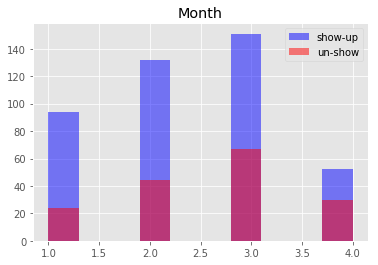

In [546]:

df_hist = df.loc[:, ['Month', 'Status']].dropna(how = 'any', axis = 0)
plt.hist(df_hist.loc[df_hist['Status']==0, 'Month'], color = 'b', alpha = 0.5, label = 'show-up')
plt.hist(df_hist.loc[df_hist['Status']==1, 'Month'], color = 'r', alpha = 0.5, label = 'un-show') 
plt.title('Month')
plt.legend(loc = 'upper right')
plt.subplots_adjust(wspace=0.3, hspace=0.6)

plt.show()

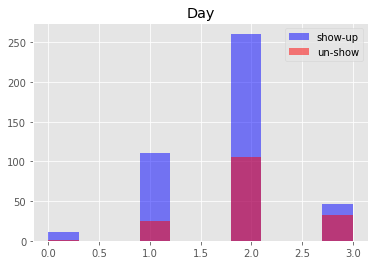

In [547]:

df_hist = df.loc[:, ['Day', 'Status']].dropna(how = 'any', axis = 0)
plt.hist(df_hist.loc[df_hist['Status']==0, 'Day'], color = 'b', alpha = 0.5, label = 'show-up')
plt.hist(df_hist.loc[df_hist['Status']==1, 'Day'], color = 'r', alpha = 0.5, label = 'un-show') 
plt.title('Day')
plt.legend(loc = 'upper right')
plt.subplots_adjust(wspace=0.3, hspace=0.6)

plt.show()

In [548]:
X2 = df.drop(['AppointmentRegistration', 'ApointmentData','Gender','DayOfTheWeek','HiperTension','Scholarship','Handcap','Smokes','Diabetes','Sms_Reminder','F','M','Tuesday','Friday','Monday','Saturday','Wednesday','Thursday','Status'],axis=1)
y2 = df['Status']

In [549]:
random_state = 0
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2, test_size=0.3, random_state=random_state)

In [550]:
X2_train.head()

,Age,Alcoolism,AwaitingTime,Month,Day
186,69,0,12.0,2,1
355,67,0,17.0,2,2
376,46,0,9.0,2,2
140,3,0,12.0,3,1
580,16,0,1.0,2,2


In [551]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(415, 5)
(415,)
(179, 5)
(179,)


In [552]:
param_grid = {'n_estimators':[100,300,500,700], 'max_depth':[2,3,4,5]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=random_state),param_grid,cv=5,scoring='roc_auc').fit(X2_train,y2_train)


print('trainデータのスコア{}'.format(grid_search.score(X2_train, y2_train)))
print('テストデータのスコア{}'.format(grid_search.score(X2_test, y2_test)))
print("best_params:{}".format(grid_search.best_params_))



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


trainデータのスコア0.8687824139556813
テストデータのスコア0.6410601976639713
best_params:{'max_depth': 5, 'n_estimators': 300}


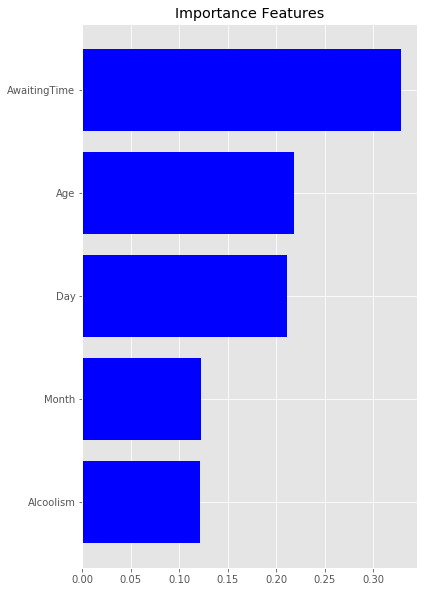

In [553]:
best_model = grid_search.best_estimator_
rfc = RandomForestClassifier(max_depth=2, n_estimators=700).fit(X2_train,y2_train)
###全ての変数の重要度
features = X2.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,10))
plt.barh(range(5), importances[indices], color='b', align='center')
plt.yticks(range(5), features[indices])
plt.title('Importance Features')
plt.show()

In [554]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, best_model.predict(X2_train))
cm_test = confusion_matrix(y_test, best_model.predict(X2_test))

def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() 
    plt.show()

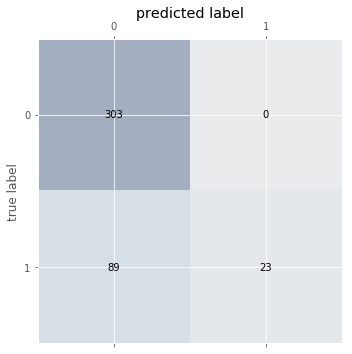

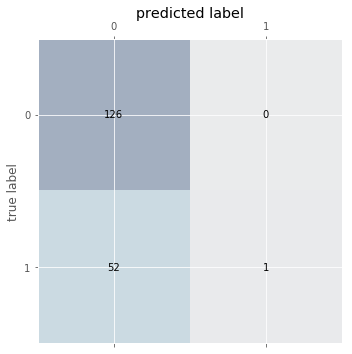

In [555]:
plot_cm(cm_train)
plot_cm(cm_test)

In [556]:
###SMOTEでオーバーサンプリング
from imblearn.over_sampling import SMOTE

positive_count_train = y2_train.sum()
print('positive count: {}'.format(positive_count_train))

smote = SMOTE(ratio={0:positive_count_train*15, 1:positive_count_train*30}, random_state=random_state)
X_train_resampled, y_train_resampled = smote.fit_sample(X2_train, y2_train)
print('y_train_resampled:\n{}'.format(pd.Series(y_train_resampled).value_counts()))


positive count: 112
y_train_resampled:
1    3360
0    1680
dtype: int64


C:\Users\admin\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:257: UserWarning: After over-sampling, the number of samples (1680) in class 0 will be larger than the number of samples in the majority class (class #0 -> 303)
  n_samples_majority))
C:\Users\admin\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:257: UserWarning: After over-sampling, the number of samples (3360) in class 1 will be larger than the number of samples in the majority class (class #0 -> 303)
  n_samples_majority))


In [557]:
###バギング
param_grid = {'n_estimators':[300,400,500,600,700], 'max_depth':[6,7,8,9,10]}
grid_search_2 = GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='roc_auc').fit(X_train_resampled,y_train_resampled)


print('trainデータのスコア{}'.format(grid_search_2.score(X_train_resampled, y_train_resampled)))
print('テストデータのスコア{}'.format(grid_search_2.score(X2_test, y2_test)))
print("best_params:{}".format(grid_search_2.best_params_))



trainデータのスコア0.9840543509070294
テストデータのスコア0.5997304582210242
best_params:{'max_depth': 10, 'n_estimators': 500}


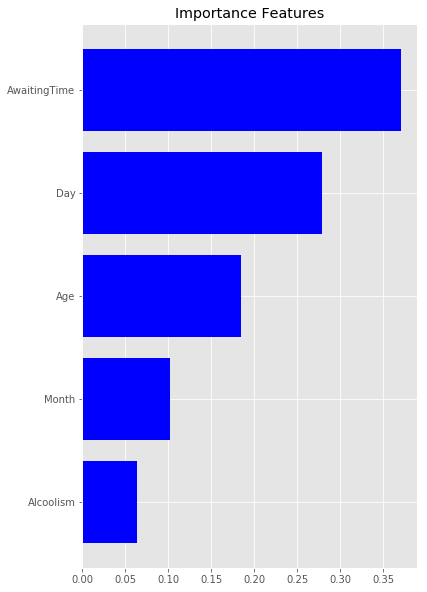

In [558]:
best_model_2 = grid_search_2.best_estimator_
rfc = RandomForestClassifier(max_depth=5,n_estimators=700).fit(X_train_resampled,y_train_resampled)
###全ての変数の重要度
features = X2.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,10))
plt.barh(range(5), importances[indices], color='b', align='center')
plt.yticks(range(5), features[indices])
plt.title('Importance Features')
plt.show()

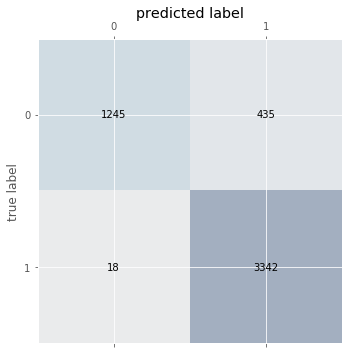

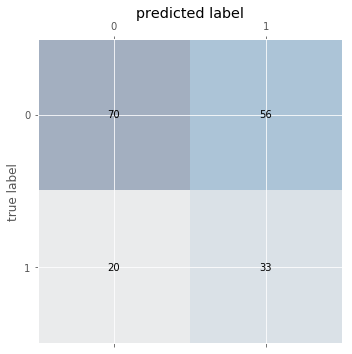

In [559]:
cm_train_2 = confusion_matrix(y_train_resampled, best_model_2.predict(X_train_resampled))
cm_test_2 = confusion_matrix(y2_test, best_model_2.predict(X2_test))

plot_cm(cm_train_2)
plot_cm(cm_test_2)

In [560]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,...,F,M,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Month,Day
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,2
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,0,0,0,0,0,...,1,0,0,0,0,0,0,1,2,1
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2,2
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,0,0,0,0,0,...,0,1,0,0,0,0,1,0,3,2


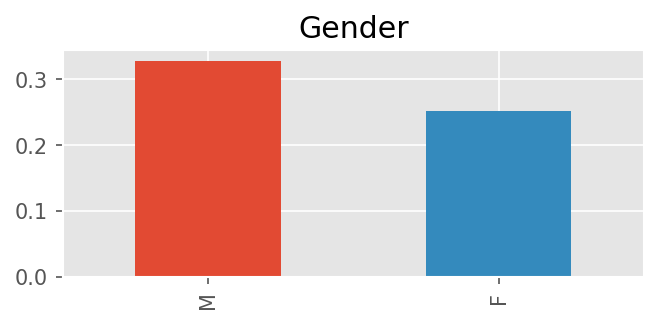

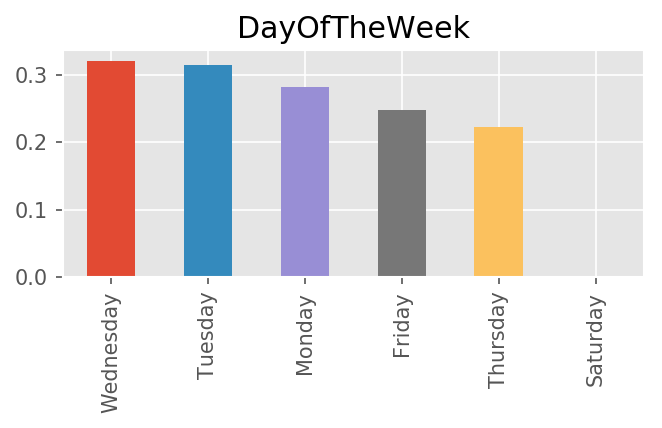

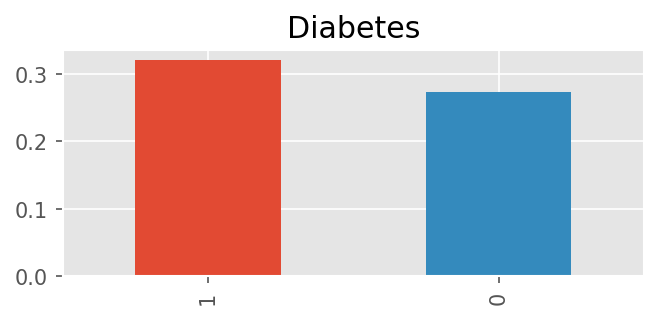

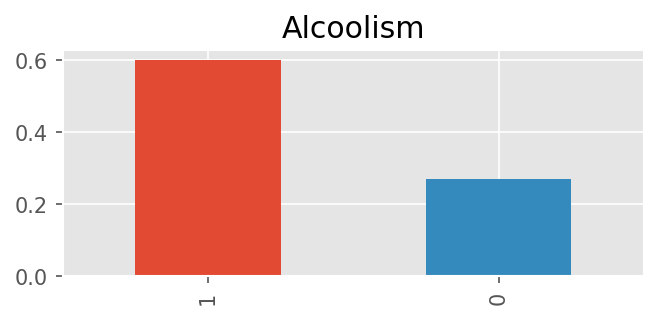

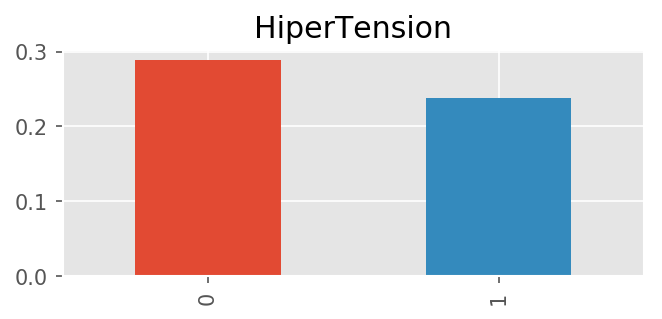

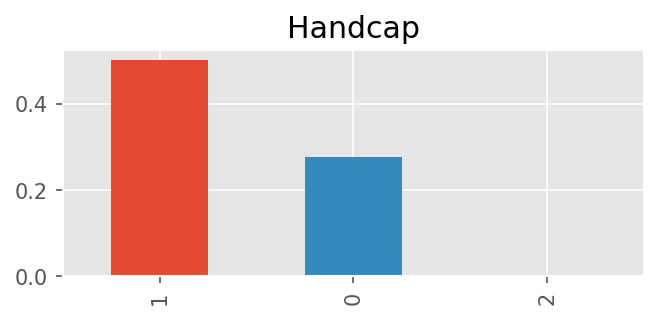

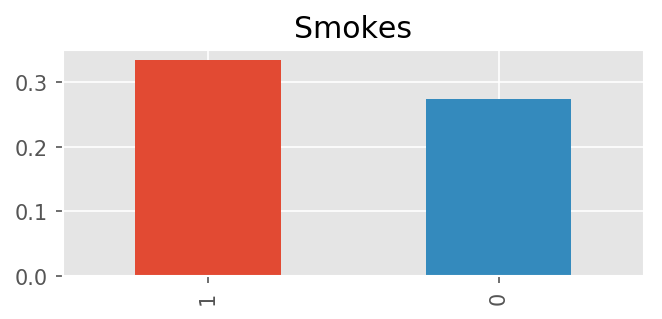

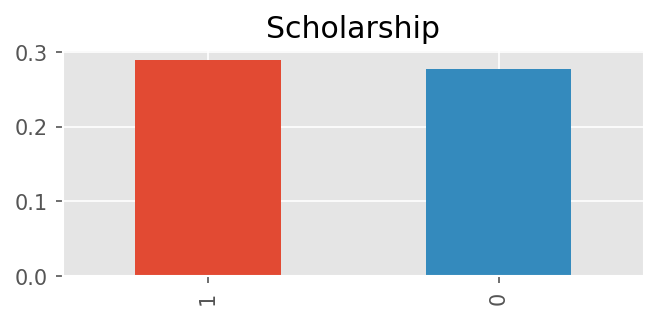

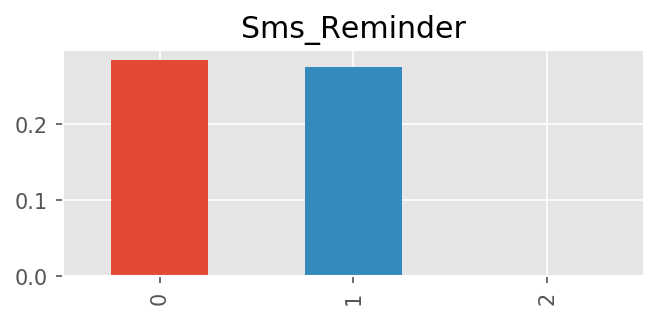

In [561]:
for data in feature_names_list:
    rate = df[df['Status']==1][data].value_counts(sort=False).sort_index()/df[data].value_counts(sort=False).sort_index()
    fig = plt.figure(figsize=(5,2),dpi=150)
    rate.sort_values(ascending=False).plot(kind='bar',title=data)
    
    

In [562]:
day_mapping = {'Saturday':0,'Wednesday':1,'Tuesday':1,'Monday':1,'Friday':1,'Thursday':1}
df['DayOfTheWeek'] = df['DayOfTheWeek'].map(day_mapping)
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,...,F,M,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Month,Day
0,19,M,2014-12-16 14:46:25,2015-01-14,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,2
1,24,F,2015-08-18 07:01:26,2015-08-19,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,2,1
2,4,F,2014-02-17 12:53:46,2014-02-18,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,5,M,2014-07-23 17:02:11,2014-08-07,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2,2
4,38,M,2015-10-21 15:20:09,2015-10-27,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,3,2


In [563]:
df_down = df.drop(['Gender','AppointmentRegistration','ApointmentData','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1)
df_down.head()

,Age,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Sms_Reminder,AwaitingTime,F,M,Month,Day
0,19,1,0,0,0,0,0,0,0,0,29.0,0,1,1,2
1,24,1,0,0,0,0,0,0,0,0,1.0,1,0,2,1
2,4,1,0,0,0,0,0,0,0,0,1.0,1,0,1,0
3,5,1,0,0,0,0,0,0,0,1,15.0,0,1,2,2
4,38,1,0,0,0,0,0,0,0,1,6.0,0,1,3,2


In [564]:
X_down = df_down.drop(['Status'],axis=1)
y_down = df_down['Status']

In [565]:
random_state = 0
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_down, y_down, test_size=0.3, random_state=random_state)

In [566]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(415, 14)
(415,)
(179, 14)
(179,)


In [567]:
#####ダウンサンプリング
from imblearn.under_sampling import RandomUnderSampler

positive_count_train = y_train.sum()
print('positive count: {}'.format(positive_count_train))

rus = RandomUnderSampler(ratio={0:positive_count_train*1, 1:positive_count_train}, random_state=0)
X_train_re, y_train_re = rus.fit_sample(X_train, y_train)
print('X__train_re.shape: {}, y_resampled: {}'.format(X_train_re.shape, y_train_re.shape))
print('y_train_re:\n{}'.format(pd.Series(y_train_re).value_counts()))


positive count: 112
X__train_re.shape: (224, 14), y_resampled: (224,)
y_train_re:
1    112
0    112
dtype: int64


In [568]:
param_grid = {'n_estimators':[100,150,200], 'max_depth':[1,2,3,4]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=random_state),param_grid,cv=5,scoring='roc_auc').fit(X_train_re,y_train_re)


print('trainデータのスコア{}'.format(grid_search.score(X_train_re, y_train_re)))
print('テストデータのスコア{}'.format(grid_search.score(X_test, y_test)))
print("best_params:{}".format(grid_search.best_params_))



trainデータのスコア0.7743542729591837
テストデータのスコア0.6135070380353399
best_params:{'max_depth': 2, 'n_estimators': 150}


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


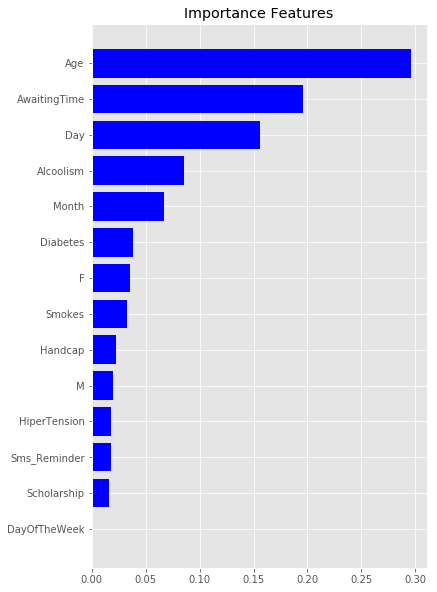

In [569]:
best_model = grid_search.best_estimator_
rfc = RandomForestClassifier(max_depth=2, n_estimators=200).fit(X_train_re,y_train_re)
###全ての変数の重要度
features = X_down.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,10))
plt.barh(range(14), importances[indices], color='b', align='center')
plt.yticks(range(14), features[indices])
plt.title('Importance Features')
plt.show()

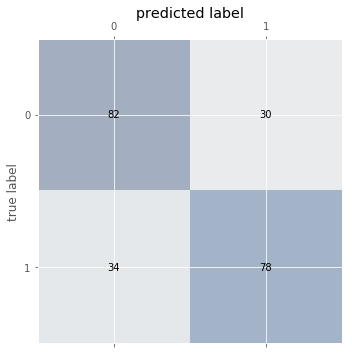

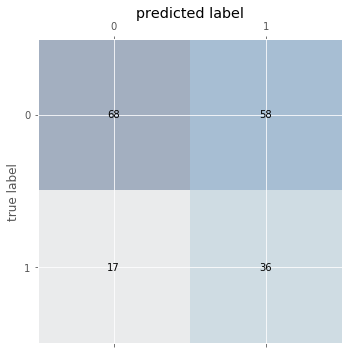

In [570]:
cm_train_re = confusion_matrix(y_train_re, best_model.predict(X_train_re))
cm_test_re = confusion_matrix(y_test, best_model.predict(X_test))

plot_cm(cm_train_re)
plot_cm(cm_test_re)

In [571]:
df = df_down.drop(['DayOfTheWeek','Smokes','Scholarship','Sms_Reminder','Handcap','M','F'],axis=1)
df.head()

,Age,Status,Diabetes,Alcoolism,HiperTension,AwaitingTime,Month,Day
0,19,0,0,0,0,29.0,1,2
1,24,0,0,0,0,1.0,2,1
2,4,0,0,0,0,1.0,1,0
3,5,0,0,0,0,15.0,2,2
4,38,0,0,0,0,6.0,3,2


In [572]:
X2 = df.drop(['Status'],axis=1)
y2 = df['Status']

In [573]:
random_state = 0
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2, test_size=0.3, random_state=random_state)

In [574]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(415, 7)
(415,)
(179, 7)
(179,)


In [575]:
#####ダウンサンプリング
from imblearn.under_sampling import RandomUnderSampler

positive_count_train = y2_train.sum()
print('positive count: {}'.format(positive_count_train))

rus = RandomUnderSampler(ratio={0:positive_count_train*2, 1:positive_count_train}, random_state=0)
X2_train_re, y2_train_re = rus.fit_sample(X2_train, y2_train)
print('X2__train_re.shape: {}, y_resampled: {}'.format(X2_train_re.shape, y2_train_re.shape))
print('y2_train_re:\n{}'.format(pd.Series(y2_train_re).value_counts()))


positive count: 112
X2__train_re.shape: (336, 7), y_resampled: (336,)
y2_train_re:
0    224
1    112
dtype: int64


In [576]:
param_grid = {'n_estimators':[300,400,500,600], 'max_depth':[2,3,4,5,6]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=random_state),param_grid,cv=5,scoring='roc_auc').fit(X2_train_re,y2_train_re)


print('trainデータのスコア{}'.format(grid_search.score(X2_train_re, y2_train_re)))
print('テストデータのスコア{}'.format(grid_search.score(X2_test, y2_test)))
print("best_params:{}".format(grid_search.best_params_))



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


trainデータのスコア0.7793566645408163
テストデータのスコア0.5970350404312669
best_params:{'max_depth': 3, 'n_estimators': 400}


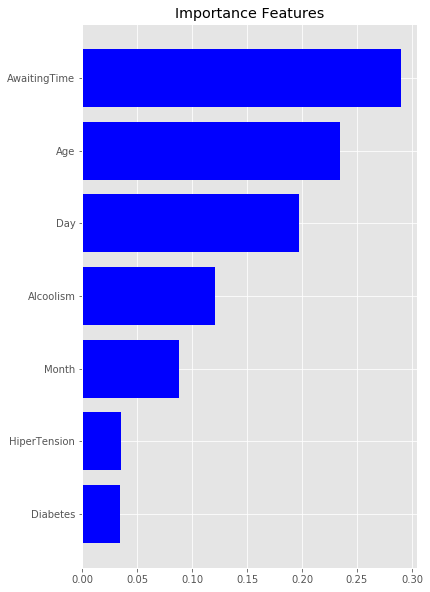

In [577]:
best_model = grid_search.best_estimator_
rfc = RandomForestClassifier(max_depth=2, n_estimators=200).fit(X2_train_re,y2_train_re)
###全ての変数の重要度
features = X2.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,10))
plt.barh(range(7), importances[indices], color='b', align='center')
plt.yticks(range(7), features[indices])
plt.title('Importance Features')
plt.show()

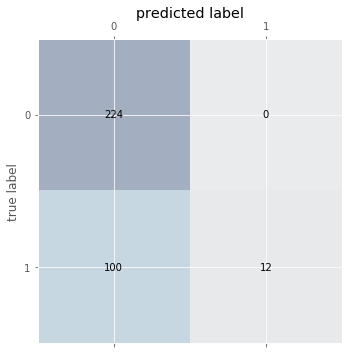

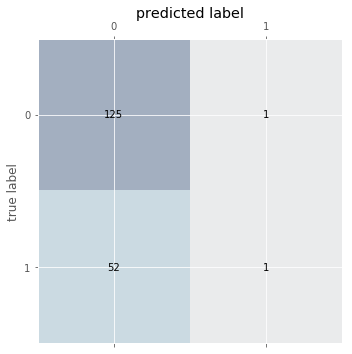

In [578]:
cm_train_re = confusion_matrix(y2_train_re, best_model.predict(X2_train_re))
cm_test_re = confusion_matrix(y2_test, best_model.predict(X2_test))

plot_cm(cm_train_re)
plot_cm(cm_test_re)

In [583]:
###SMOTEでオーバーサンプリング
from imblearn.over_sampling import SMOTE

positive_count_train = y2_train.sum()
print('positive count: {}'.format(positive_count_train))

smote = SMOTE(ratio={0:positive_count_train*3, 1:positive_count_train*3}, random_state=random_state)
X_train_resampled, y_train_resampled = smote.fit_sample(X2_train, y2_train)
print('y_train_resampled:\n{}'.format(pd.Series(y_train_resampled).value_counts()))


positive count: 112
y_train_resampled:
1    336
0    336
dtype: int64


C:\Users\admin\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:257: UserWarning: After over-sampling, the number of samples (336) in class 0 will be larger than the number of samples in the majority class (class #0 -> 303)
  n_samples_majority))
C:\Users\admin\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:257: UserWarning: After over-sampling, the number of samples (336) in class 1 will be larger than the number of samples in the majority class (class #0 -> 303)
  n_samples_majority))


In [584]:
param_grid = {'n_estimators':[500,600,700,800], 'max_depth':[5,6,7,8,9]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=random_state),param_grid,cv=5,scoring='roc_auc').fit(X_train_resampled,y_train_resampled)


print('trainデータのスコア{}'.format(grid_search.score(X_train_resampled, y_train_resampled)))
print('テストデータのスコア{}'.format(grid_search.score(X2_test, y2_test)))
print("best_params:{}".format(grid_search.best_params_))



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


trainデータのスコア0.9850038973922902
テストデータのスコア0.619047619047619
best_params:{'max_depth': 9, 'n_estimators': 500}


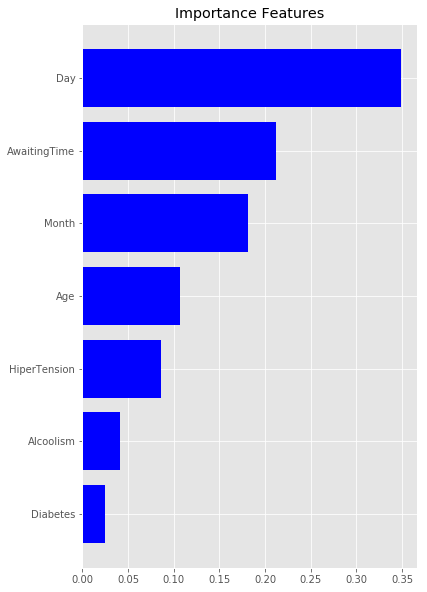

In [585]:
best_model = grid_search.best_estimator_
rfc = RandomForestClassifier(max_depth=2, n_estimators=200).fit(X_train_resampled,y_train_resampled)
###全ての変数の重要度
features = X2.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,10))
plt.barh(range(7), importances[indices], color='b', align='center')
plt.yticks(range(7), features[indices])
plt.title('Importance Features')
plt.show()

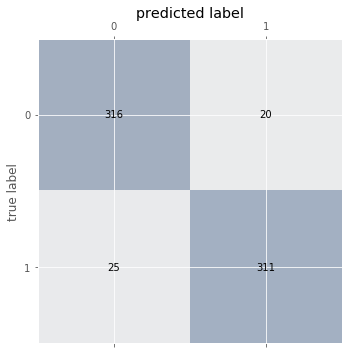

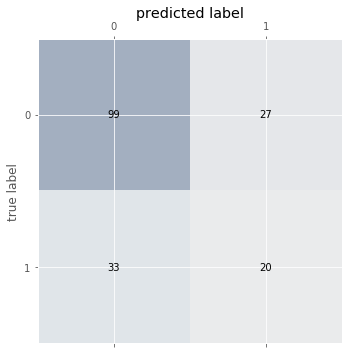

In [586]:
cm_train_re = confusion_matrix(y_train_resampled, best_model.predict(X_train_resampled))
cm_test_re = confusion_matrix(y2_test, best_model.predict(X2_test))

plot_cm(cm_train_re)
plot_cm(cm_test_re)

In [ ]:
#####ロジスティック回帰とSVMでの結果

In [620]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X2)
X2_std = scaler.transform(X2)

# データセットの分割
from sklearn.model_selection import train_test_split
X2_train_std, X2_test_std, y2_train_std, y2_test_std = train_test_split(X2_std, y2, test_size=0.3, random_state=random_state)

###SMOTEでオーバーサンプリング
from imblearn.over_sampling import SMOTE

positive_count_train = y2_train_std.sum()
print('positive count: {}'.format(positive_count_train))

smote = SMOTE(ratio={0:positive_count_train*3, 1:positive_count_train*3}, random_state=random_state)
X2_train_std_resampled, y2_train_std_resampled = smote.fit_sample(X2_train_std, y2_train_std)
print('y_train_resampled:\n{}'.format(pd.Series(y2_train_std_resampled).value_counts()))


# ロジスティック回帰の実行
from sklearn.linear_model import LogisticRegression
param_grid_lr = {'C':[ 0.1, 1.0, 3,5]}
lr = LogisticRegression()
grid_lr = GridSearchCV(lr, param_grid=param_grid_lr, cv=5)
grid_lr.fit(X2_train_std_resampled, y2_train_std_resampled)

# 正答率を出力
print(grid_lr.best_params_)
print('train acc: %.3f' % grid_lr.score(X2_train_std_resampled, y2_train_std_resampled))
print('test acc: %.3f' % grid_lr.score(X2_test_std, y2_test_std))

positive count: 112
y_train_resampled:
1    336
0    336
dtype: int64
{'C': 3}
train acc: 0.626
test acc: 0.536


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\admin\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:257: UserWarning: After over-sampling, the number of samples (336) in class 0 will be larger than the number of samples in the majority class (class #0 -> 303)
  n_samples_majority))
C:\Users\admin\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:257: UserWarning: After over-sampling, the number of samples (336) in class 1 will be larger than the number of samples in the majority class (class #0 -> 303)
  n_samples_majority))
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: Futur

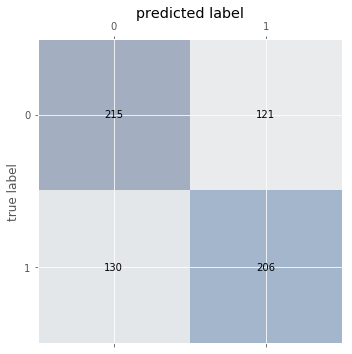

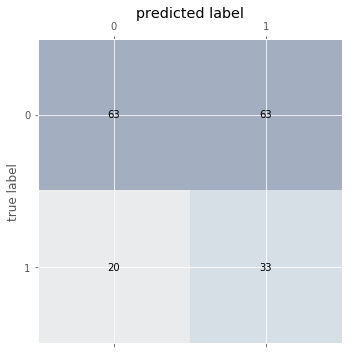

In [621]:
best_model_lr = grid_lr.best_estimator_

cm_train_lgr = confusion_matrix(y2_train_std_resampled, best_model_lr.predict(X2_train_std_resampled))
cm_test_lgr = confusion_matrix(y2_test, best_model_lr.predict(X2_test_std))

plot_cm(cm_train_lgr)
plot_cm(cm_test_lgr)

In [622]:
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

from sklearn.svm import SVC
gs_svc = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kf_5)

gs_svc.fit(X2_train_std_resampled, y2_train_std_resampled)
print(gs_svc.best_params_)
print(gs_svc.best_score_)
print(gs_svc.score(X2_test_std, y2_test_std))

{'C': 100, 'gamma': 1}
0.7827380952380952
0.6312849162011173


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


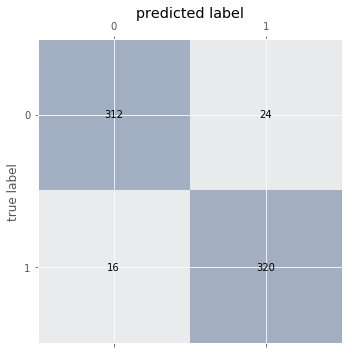

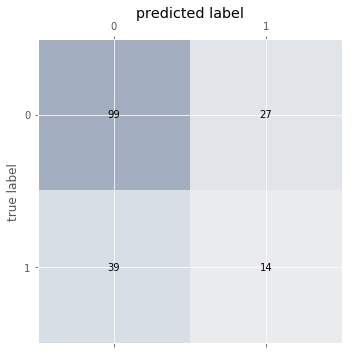

In [623]:
best_model_svm = gs_svc.best_estimator_

cm_train_svm = confusion_matrix(y2_train_std_resampled, best_model_svm.predict(X2_train_std_resampled))
cm_test_svm = confusion_matrix(y2_test, best_model_svm.predict(X2_test_std))

plot_cm(cm_train_svm)
plot_cm(cm_test_svm)